In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import numba as nb
from scipy import stats
from scipy import optimize

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy.optimize import minimize
import pandas as pd
import seaborn as sns

np.set_printoptions(suppress=True, precision=6)

In [2]:
from breakdown_uncertainty_me_tax import SimpleBreakdownModelClass

# Base model

In [3]:
base_model = SimpleBreakdownModelClass(par={'r':0.02,'beta':0.98,'Nm':5,'upsilon':1.05,'rho':12.0,'gamma_max':0.012,'gamma_min':0.019,'tau':5,'tax':0.4,'su':0.16,'sigma_s':0.3,'sigma_w':0.1})
base_model_c = SimpleBreakdownModelClass(par={'r':0.02,'beta':0.98,'Nm':5,'upsilon':1.05,'rho':12.0,'gamma_max':0.012,'gamma_min':0.018,'tau':5,'tax':0.4,'su':0.16,'sigma_s':0.3,'sigma_w':0.1})

In [4]:
par = base_model.par
sol = base_model.sol
sim = base_model.sim

In [5]:
%time base_model_c.solve()

48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
CPU times: user 8min 29s, sys: 5.55 s, total: 8min 35s
Wall time: 9min 39s


In [6]:
%time base_model.solve()

48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
CPU times: user 7min 27s, sys: 3.72 s, total: 7min 31s
Wall time: 8min 19s


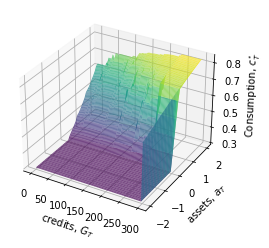

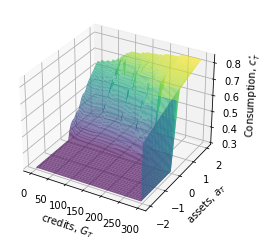

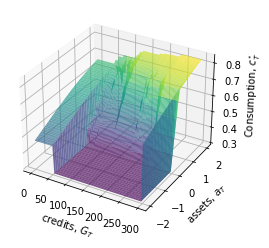

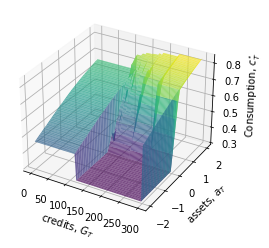

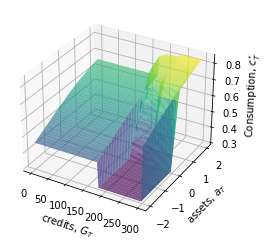

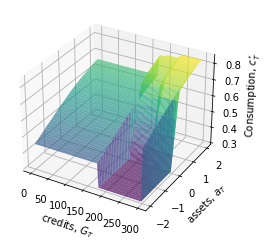

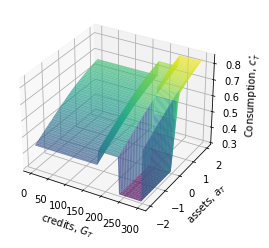

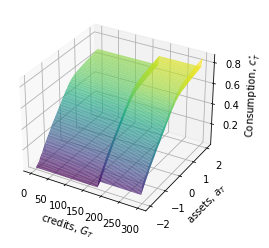

In [7]:
# consumption while studying
a_mesh, G_mesh = np.meshgrid(par.a_grid,par.G_grid,indexing='ij')

for t in range(par.T-49,par.T-42):
    fig = plt.figure()
    ax = plt.axes(projection='3d')

    ax.plot_surface(G_mesh, a_mesh, sol.c[t,2,:,:],rstride=1,cstride=1,cmap='viridis', edgecolor='none',alpha=0.75);
    ax.set(xlabel='credits, $G_{T}$',ylabel='assets, $a_T$',zlabel='Consumption, $c_{T}^{\star}$');

#consumption period 31
t = par.T-31

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(G_mesh, a_mesh, sol.c[t,2,:,:],rstride=1,cstride=1,cmap='viridis', edgecolor='none',alpha=0.75);
ax.set(xlabel='credits, $G_{T}$',ylabel='assets, $a_T$',zlabel='Consumption, $c_{T}^{\star}$');

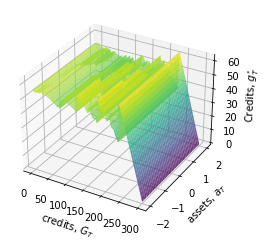

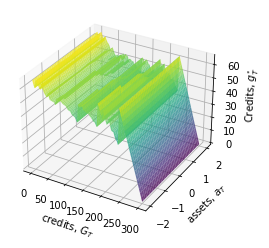

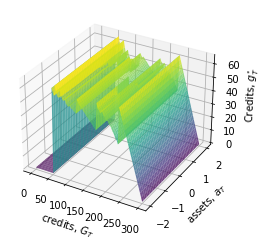

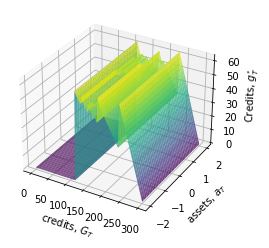

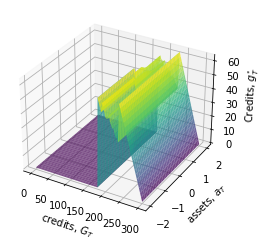

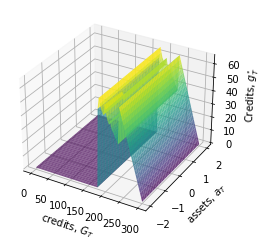

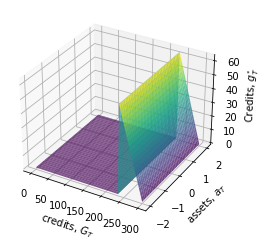

In [8]:
# ects while studying
a_mesh, G_mesh = np.meshgrid(par.a_grid,par.G_grid,indexing='ij')

for t in range(par.T-49,par.T-42):
    fig = plt.figure()
    ax = plt.axes(projection='3d')

    ax.plot_surface(G_mesh, a_mesh, sol.g[t,2,:,:],rstride=1,cstride=1,cmap='viridis', edgecolor='none',alpha=0.75);
    ax.set(xlabel='credits, $G_{T}$',ylabel='assets, $a_T$',zlabel='Credits, $g_{T}^{\star}$');

### Simulation

In [9]:
base_model_sim = base_model.copy()

#base_model_sim.sim.m_init[:] = 0
base_model_sim.sim.a_init[:] = 0.0
base_model_sim.sim.e_init[:] = 0
base_model_sim.simulate()

In [10]:
base_model_sim_c = base_model_c.copy()

#base_model_sim.sim.m_init[:] = 0
base_model_sim_c.sim.a_init[:] = 0.0
base_model_sim_c.sim.e_init[:] = 0
base_model_sim_c.simulate()

In [11]:
sim_a_list_c = np.around(np.mean(base_model_sim_c.sim.a,axis=0),decimals=2)

In [12]:
sim_a_list = np.around(np.mean(base_model_sim.sim.a,axis=0),decimals=2)
sim_a_list[0:7] = sim_a_list_c[0:7]
#sim_a_list[5] = sim_a_list[4]
sim_a_list_c

array([ 0.  , -0.  , -0.  , -0.  , -0.  , -0.  ,  0.01, -0.02,  0.  ,
        0.03,  0.06,  0.1 ,  0.13,  0.16,  0.19,  0.22,  0.26,  0.29,
        0.33,  0.36,  0.4 ,  0.43,  0.46,  0.48,  0.5 ,  0.52,  0.53,
        0.54,  0.55,  0.56,  0.56,  0.57,  0.57,  0.57,  0.57,  0.57,
        0.56,  0.56,  0.55,  0.54,  0.53,  0.51,  0.5 ,  0.48,  0.45,
        0.42,  0.38,  0.32,  0.17])

In [13]:
np.around(np.mean(base_model_sim.sim.a,axis=0),decimals=5)

array([ 0.     , -0.     , -0.00082, -0.00104, -0.00212, -0.00872,
       -0.00352, -0.03592, -0.00665,  0.02313,  0.05334,  0.08481,
        0.11691,  0.14916,  0.18244,  0.21621,  0.24946,  0.28445,
        0.31951,  0.35471,  0.39061,  0.42491,  0.45801,  0.47961,
        0.49792,  0.51337,  0.52592,  0.53682,  0.54545,  0.55282,
        0.55805,  0.56249,  0.56448,  0.56526,  0.56403,  0.5613 ,
        0.55677,  0.55064,  0.54316,  0.53477,  0.52425,  0.51023,
        0.4939 ,  0.47339,  0.44843,  0.415  ,  0.37364,  0.31579,
        0.16871])

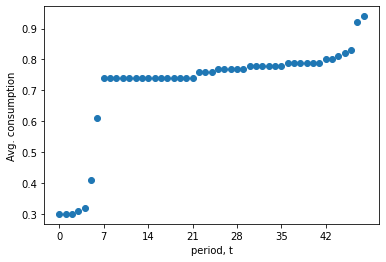

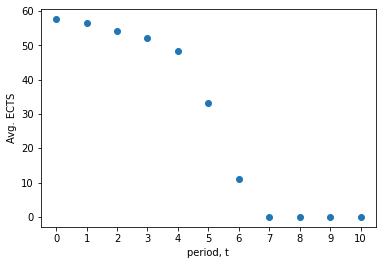

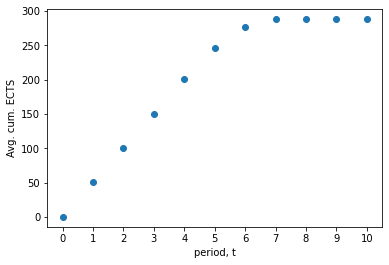

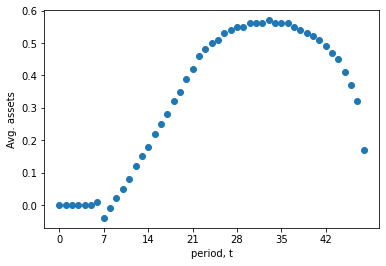

In [14]:
#Simulation graphs
fig, ax = plt.subplots()
ax.scatter(range(par.simT),np.around(np.mean(base_model_sim.sim.c,axis=0),decimals=2))
ax.set(xlabel='period, t',ylabel='Avg. consumption',xticks=range(0,par.simT,7));

fig, ax = plt.subplots()
ax.scatter(range(par.t_ls+5),np.around(np.mean(base_model_sim.sim.g[:,0:par.t_ls+5],axis=0),decimals=2))
ax.set(xlabel='period, t',ylabel='Avg. ECTS',xticks=range(par.t_ls+5));

fig, ax = plt.subplots()
ax.scatter(range(par.t_ls+5),np.around(np.mean(base_model_sim.sim.G[:,0:par.t_ls+5],axis=0),decimals=2))
ax.set(xlabel='period, t',ylabel='Avg. cum. ECTS',xticks=range(par.t_ls+5));

fig, ax = plt.subplots()
ax.scatter(range(par.simT),sim_a_list)
ax.set(xlabel='period, t',ylabel='Avg. assets',xticks=range(0,par.simT,7));

## Avg. utility

In [152]:
np.sum(np.mean(base_model_sim.sim.V, axis=0))

-47.82428778412172

In [15]:
base_model_sim.sim.g[17,0:3]

array([68.999984, 67.878598, 58.045537])

# Statistics by type

In [16]:
time = np.zeros(par.Nm)

In [17]:
m_0 = []
m_1 = []
m_2 = []
m_3 = []
m_4 = []

for i_idx, i in enumerate(base_model_sim.sim.m_init):
    
    if i == 0:
        m_0.append(i_idx)
    
    if i == 1:
        m_1.append(i_idx)
    
    if i == 2:
        m_2.append(i_idx)
    
    if i == 3:
        m_3.append(i_idx)
    
    if i == 4:
        m_4.append(i_idx)


In [155]:
utility = np.zeros(par.Nm)

util_0 = []
for i in m_0:
    util_0.append(np.sum(base_model_sim.sim.V[i,:]))

utility[0] = np.mean(util_0)

util_1 = []
for i in m_1:
    util_1.append(np.sum(base_model_sim.sim.V[i,:]))

utility[1] = np.mean(util_1)

util_2 = []
for i in m_2:
    util_2.append(np.sum(base_model_sim.sim.V[i,:]))

utility[2] = np.mean(util_2)

util_3 = []
for i in m_3:
    util_3.append(np.sum(base_model_sim.sim.V[i,:]))

utility[3] = np.mean(util_3)

util_4 = []
for i in m_4:
    util_4.append(np.sum(base_model_sim.sim.V[i,:]))

utility[4] = np.mean(util_4)

print(utility)



[-47.836199 -47.821163 -47.81598  -47.836073 -47.812346]


## Average completion time

In [18]:
#type 0
study_0 = np.zeros(len(m_0))

for idx, i in enumerate(m_0):
        if base_model_sim.sim.G[i,par.T-1] < 299:
                study_0[idx] = np.NaN
        else:
                study_0[idx] = np.sum(base_model_sim.sim.g[i,:]>0.000001)

time[0] = np.nanmean(study_0)

#type 1
study_1 = np.zeros(len(m_1))

for idx, i in enumerate(m_1):
        if base_model_sim.sim.G[i,par.T-1] < 299:
                study_1[idx] = np.NaN
        else:
                study_1[idx] = np.sum(base_model_sim.sim.g[i,:]>0.000001)

time[1] = np.nanmean(study_1)

#type 2
study_2 = np.zeros(len(m_2))

for idx, i in enumerate(m_2):
        if base_model_sim.sim.G[i,par.T-1] < 299:
                study_2[idx] = np.NaN
        else:
                study_2[idx] = np.sum(base_model_sim.sim.g[i,:]>0.000001)

time[2] = np.nanmean(study_2)

#type 3
study_3 = np.zeros(len(m_3))

for idx, i in enumerate(m_3):
        if base_model_sim.sim.G[i,par.T-1] < 299:
                study_3[idx] = np.NaN
        else:
                study_3[idx] = np.sum(base_model_sim.sim.g[i,:]>0.000001)

time[3] = np.nanmean(study_3)

#type 4
study_4 = np.zeros(len(m_4))

for idx, i in enumerate(m_4):
        if base_model_sim.sim.G[i,par.T-1] < 299:
                study_4[idx] = np.NaN
        else:
                study_4[idx] = np.sum(base_model_sim.sim.g[i,:]>0.000001)

time[4] = np.nanmean(study_4)

print(time)


[7.       6.541517 6.196639 5.683297 5.310012]


# Average completed ECTS points

In [19]:
ects = np.zeros(par.Nm)

list_0 = []
for i in m_0:
    list_0.append(base_model_sim.sim.G[i,par.T-1])

ects[0] = np.mean(list_0)

list_1 = []
for i in m_1:
    list_1.append(base_model_sim.sim.G[i,par.T-1])

ects[1] = np.mean(list_1)

list_2 = []
for i in m_2:
    list_2.append(base_model_sim.sim.G[i,par.T-1])

ects[2] = np.mean(list_2)

list_3 = []
for i in m_3:
    list_3.append(base_model_sim.sim.G[i,par.T-1])

ects[3] = np.mean(list_3)

list_4 = []
for i in m_4:
    list_4.append(base_model_sim.sim.G[i,par.T-1])

ects[4] = np.mean(list_4)

print(ects)



[253.074935 290.25583  296.715327 299.04795  299.785375]


## How many: drop out, bachelors degree, masters degree

In [20]:
dropout_0=0
dropout_1=0
dropout_2=0
dropout_3=0
dropout_4=0

bachelor_0=0
bachelor_1=0
bachelor_2=0
bachelor_3=0
bachelor_4=0

masters_0=0
masters_1=0
masters_2=0
masters_3=0
masters_4=0

In [21]:
dropout_counts = []
bachelor_counts = []
masters_counts = []

for lst, dropout_count, bachelor_count, masters_count in zip([list_0, list_1, list_2, list_3, list_4], 
                                                              [dropout_0, dropout_1, dropout_2, dropout_3, dropout_4], 
                                                              [bachelor_0, bachelor_1, bachelor_2, bachelor_3, bachelor_4], 
                                                              [masters_0, masters_1, masters_2, masters_3, masters_4]):
    dropout_counts.append(dropout_count)
    bachelor_counts.append(bachelor_count)
    masters_counts.append(masters_count)

    for i in lst:
        if i < par.bachelor:
            dropout_counts[-1] += 1
        if par.bachelor <= i < par.complete - 1e-5:
            bachelor_counts[-1] += 1
        if par.complete-1e-5<=i:
            masters_counts[-1] += 1

dropout_shares = [count / len(lst) * 100 for count, lst in zip(dropout_counts, [list_0, list_1, list_2, list_3, list_4])]
bachelor_shares = [count / len(lst) * 100 for count, lst in zip(bachelor_counts, [list_0, list_1, list_2, list_3, list_4])]
masters_shares = [count / len(lst) * 100 for count, lst in zip(masters_counts, [list_0, list_1, list_2, list_3, list_4])]

In [22]:
print(dropout_shares)
print(bachelor_shares)
print(masters_shares)

[18.240647118301315, 5.2741566325007465, 1.837399980243011, 0.5457432030164715, 0.12170385395537525]
[11.031344792719919, 0.28858592894815405, 0.0, 0.009922603691208573, 0.0]
[70.72800808897877, 94.4372574385511, 98.16260001975698, 99.44433419329232, 99.87829614604462]


<AxesSubplot:xlabel='Type', ylabel='Share'>

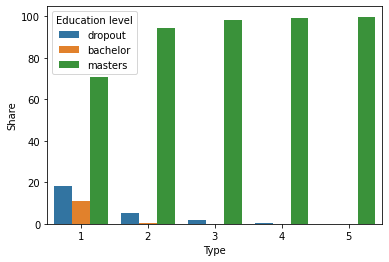

In [23]:
stats_df = pd.DataFrame(data=[dropout_shares, bachelor_shares, masters_shares], columns=['1', '2', '3', '4', '5'], index=['dropout', 'bachelor', 'masters'])

stats_df_long = stats_df.reset_index().melt(id_vars='index', var_name='category', value_name='value')

# Rename the columns
stats_df_long.columns = ['Education level', 'Type', 'Share']

# Plot the data
sns.barplot(data=stats_df_long, x='Type', y='Share', hue='Education level')

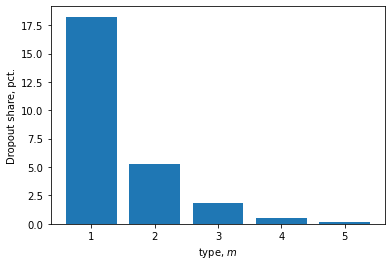

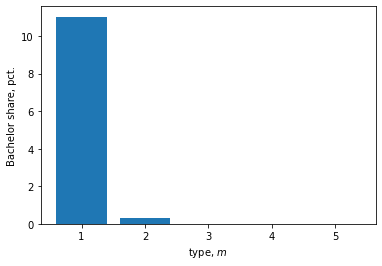

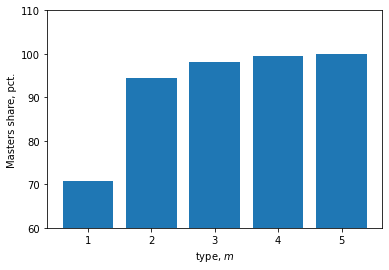

In [24]:
#Seperate plots

fig, ax = plt.subplots()
ax.bar(range(1,(par.Nm+1)),dropout_shares)
ax.set(xlabel='type, $m$',ylabel='Dropout share, pct.');

fig, ax = plt.subplots()
ax.bar(range(1,(par.Nm+1)),bachelor_shares)
ax.set(xlabel='type, $m$',ylabel='Bachelor share, pct.');

fig, ax = plt.subplots()
ax.bar(range(1,(par.Nm+1)),masters_shares)
ax.set(xlabel='type, $m$',ylabel='Masters share, pct.')
ax.set_ylim(60,110);

## How many takes slutloans?


In [25]:
slutloan = np.zeros(par.Nm)

#type 0
slutloan_0 = np.zeros(len(m_0))

for idx, i in enumerate(m_0):
        slutloan_0[idx] = base_model_sim.sim.g[i,par.t_ls]>0.000001

slutloan[0] = np.sum(slutloan_0)/len(m_0)*100

#type 1
slutloan_1 = np.zeros(len(m_1))

for idx, i in enumerate(m_1):
        slutloan_1[idx] = base_model_sim.sim.g[i,par.t_ls]>0.000001

slutloan[1] = np.sum(slutloan_1)/len(m_1)*100

#type 2
slutloan_2 = np.zeros(len(m_2))

for idx, i in enumerate(m_2):
        slutloan_2[idx] = base_model_sim.sim.g[i,par.t_ls]>0.000001

slutloan[2] = np.sum(slutloan_2)/len(m_2)*100

#type 3
slutloan_3 = np.zeros(len(m_3))

for idx, i in enumerate(m_3):
        slutloan_3[idx] = base_model_sim.sim.g[i,par.t_ls]>0.000001

slutloan[3] = np.sum(slutloan_3)/len(m_3)*100

#type 4
slutloan_4 = np.zeros(len(m_4))

for idx, i in enumerate(m_4):
        slutloan_4[idx] = base_model_sim.sim.g[i,par.t_ls]>0.000001

slutloan[4] = np.sum(slutloan_4)/len(m_4)*100

In [26]:
slutloan

array([72.699697, 51.308588, 19.302578,  4.703314,  0.608519])

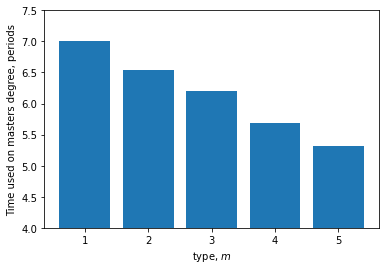

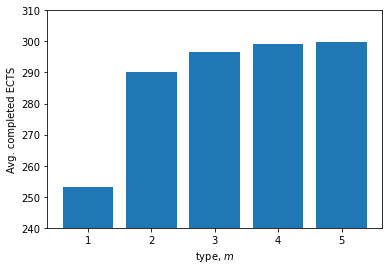

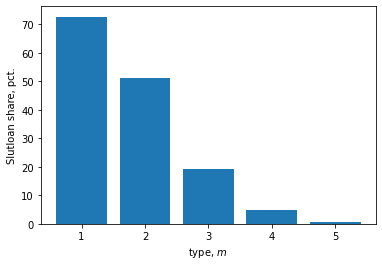

In [27]:
fig, ax = plt.subplots()
ax.bar(range(1,(par.Nm+1)),time,bottom=0)
ax.set(xlabel='type, $m$',ylabel='Time used on masters degree, periods')
ax.set_ylim([4, 7.5]);

fig, ax = plt.subplots()
ax.bar(range(1,(par.Nm+1)),ects)
ax.set(xlabel='type, $m$',ylabel='Avg. completed ECTS')
ax.set_ylim([240, 310]);

fig, ax = plt.subplots()
ax.bar(range(1,(par.Nm+1)),slutloan)
ax.set(xlabel='type, $m$',ylabel='Slutloan share, pct.');

fig, ax = plt.subplots()
ax.bar(range(1,(par.Nm+1)),utility)
ax.set(xlabel='type, $m$',ylabel='Avg. discounted utility');



# 2025 reform

Finding optimal tax

In [28]:
# def zero_budget(tax):
#     model_reform1 = SimpleBreakdownModelClass(par={'r':0.02,'beta':0.98,'Nm':5,'upsilon':1.05,'rho':12.0,'gamma_max':0.012,'gamma_min':0.019,'tau':4,'tax':tax,'su':0.16,'sigma_s':0.3,'sigma_w':0.1})
#     model_reform1.solve()
#     model_reform1.sim.a_init[:]=0.0
#     model_reform1.sim.e_init[:]=0.0
#     model_reform1.simulate()
#     return ((np.sum(0.4*np.mean(model_reform1.sim.income[:,:-1],axis=0)) - (np.sum(np.mean(model_reform1.sim.su[:,:-1],axis=0))))-(np.sum(0.4*np.mean(base_model_sim.sim.income[:,:-1],axis=0)) - (np.sum(np.mean(base_model_sim.sim.su[:,:-1],axis=0)))))

# res1 = optimize.root_scalar(zero_budget, bracket=[0.2, 0.45], method='brentq')

In [29]:
#print(res1)

In [30]:
#reform_2024 = print(res1.root)

Loading model with unchanged budget tax

In [31]:
model_reform1 = SimpleBreakdownModelClass(par={'r':0.02,'beta':0.98,'Nm':5,'upsilon':1.05,'rho':12.0,'gamma_max':0.012,'gamma_min':0.019,'tau':4,'tax':0.4,'su':0.16,'sigma_s':0.3,'sigma_w':0.1})

In [32]:
par = model_reform1.par
sol = model_reform1.sol
sim = model_reform1.sim

In [33]:
%time model_reform1.solve()

48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
CPU times: user 8min 40s, sys: 7.44 s, total: 8min 47s
Wall time: 9min 35s


In [34]:
model_reform1.sim.a_init[:] = 0.0
model_reform1.sim.e_init[:] = 0
model_reform1.simulate()

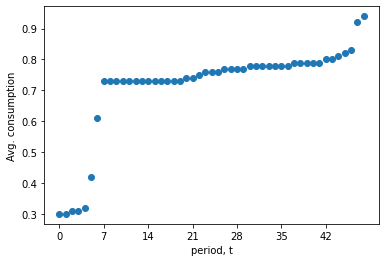

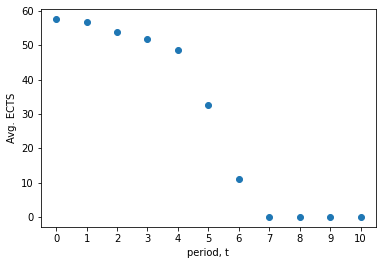

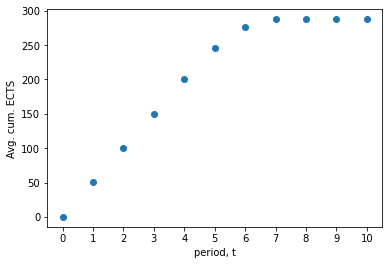

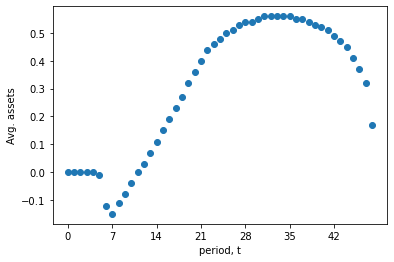

In [35]:
#Simulation graphs
fig, ax = plt.subplots()
ax.scatter(range(par.simT),np.around(np.mean(model_reform1.sim.c,axis=0),decimals=2))
ax.set(xlabel='period, t',ylabel='Avg. consumption',xticks=range(0,par.simT,7));

fig, ax = plt.subplots()
ax.scatter(range(par.t_ls+5),np.around(np.mean(model_reform1.sim.g[:,0:par.t_ls+5],axis=0),decimals=2))
ax.set(xlabel='period, t',ylabel='Avg. ECTS',xticks=range(par.t_ls+5));

fig, ax = plt.subplots()
ax.scatter(range(par.t_ls+5),np.around(np.mean(model_reform1.sim.G[:,0:par.t_ls+5],axis=0),decimals=2))
ax.set(xlabel='period, t',ylabel='Avg. cum. ECTS',xticks=range(par.t_ls+5));

fig, ax = plt.subplots()
ax.scatter(range(par.simT),np.around(np.mean(model_reform1.sim.a,axis=0),decimals=2))
ax.set(xlabel='period, t',ylabel='Avg. assets',xticks=range(0,par.simT,7));

In [158]:
np.sum(np.mean(model_reform1.sim.V, axis=0))

-47.97174097327789

## Types

In [137]:
time = np.zeros(par.Nm)

In [138]:
m_0 = []
m_1 = []
m_2 = []
m_3 = []
m_4 = []

for i_idx, i in enumerate(model_reform1.sim.m_init):
    
    if i == 0:
        m_0.append(i_idx)
    
    if i == 1:
        m_1.append(i_idx)
    
    if i == 2:
        m_2.append(i_idx)
    
    if i == 3:
        m_3.append(i_idx)
    
    if i == 4:
        m_4.append(i_idx)


In [ ]:
utility = np.zeros(par.Nm)

util_0 = []
for i in m_0:
    util_0.append(np.sum(model_reform1.sim.V[i,:]))

utility[0] = np.mean(util_0)

util_1 = []
for i in m_1:
    util_1.append(np.sum(model_reform1.sim.V[i,:]))

utility[1] = np.mean(util_1)

util_2 = []
for i in m_2:
    util_2.append(np.sum(model_reform1.sim.V[i,:]))

utility[2] = np.mean(util_2)

util_3 = []
for i in m_3:
    util_3.append(np.sum(model_reform1.sim.V[i,:]))

utility[3] = np.mean(util_3)

util_4 = []
for i in m_4:
    util_4.append(np.sum(model_reform1.sim.V[i,:]))

utility[4] = np.mean(util_4)

print(utility)



[-47.836199 -47.821163 -47.81598  -47.836073 -47.812346]


## Average completion time

In [139]:
#type 0
study_0 = np.zeros(len(m_0))

for idx, i in enumerate(m_0):
        if model_reform1.sim.G[i,par.T-1] < 299:
                study_0[idx] = np.NaN
        else:
                study_0[idx] = np.sum(model_reform1.sim.g[i,:]>0.000001)

time[0] = np.nanmean(study_0)

#type 1
study_1 = np.zeros(len(m_1))

for idx, i in enumerate(m_1):
        if model_reform1.sim.G[i,par.T-1] < 299:
                study_1[idx] = np.NaN
        else:
                study_1[idx] = np.sum(model_reform1.sim.g[i,:]>0.000001)

time[1] = np.nanmean(study_1)

#type 2
study_2 = np.zeros(len(m_2))

for idx, i in enumerate(m_2):
        if model_reform1.sim.G[i,par.T-1] < 299:
                study_2[idx] = np.NaN
        else:
                study_2[idx] = np.sum(model_reform1.sim.g[i,:]>0.000001)

time[2] = np.nanmean(study_2)

#type 3
study_3 = np.zeros(len(m_3))

for idx, i in enumerate(m_3):
        if model_reform1.sim.G[i,par.T-1] < 299:
                study_3[idx] = np.NaN
        else:
                study_3[idx] = np.sum(model_reform1.sim.g[i,:]>0.000001)

time[3] = np.nanmean(study_3)

#type 4
study_4 = np.zeros(len(m_4))

for idx, i in enumerate(m_4):
        if model_reform1.sim.G[i,par.T-1] < 299:
                study_4[idx] = np.NaN
        else:
                study_4[idx] = np.sum(model_reform1.sim.g[i,:]>0.000001)

time[4] = np.nanmean(study_4)

print(time)


[7.       6.53668  6.193548 5.670152 5.295269]


# Average completed ECTS points

In [140]:
ects = np.zeros(par.Nm)

list_0 = []
for i in m_0:
    list_0.append(model_reform1.sim.G[i,par.T-1])

ects[0] = np.mean(list_0)

list_1 = []
for i in m_1:
    list_1.append(model_reform1.sim.G[i,par.T-1])

ects[1] = np.mean(list_1)

list_2 = []
for i in m_2:
    list_2.append(model_reform1.sim.G[i,par.T-1])

ects[2] = np.mean(list_2)

list_3 = []
for i in m_3:
    list_3.append(model_reform1.sim.G[i,par.T-1])

ects[3] = np.mean(list_3)

list_4 = []
for i in m_4:
    list_4.append(model_reform1.sim.G[i,par.T-1])

ects[4] = np.mean(list_4)

print(ects)



[251.967829 290.578536 296.241746 298.800326 299.89832 ]


## How many: drop out, bachelors degree, masters degree

In [141]:
dropout_0=0
dropout_1=0
dropout_2=0
dropout_3=0
dropout_4=0

bachelor_0=0
bachelor_1=0
bachelor_2=0
bachelor_3=0
bachelor_4=0

masters_0=0
masters_1=0
masters_2=0
masters_3=0
masters_4=0

In [142]:
dropout_counts = []
bachelor_counts = []
masters_counts = []

for lst, dropout_count, bachelor_count, masters_count in zip([list_0, list_1, list_2, list_3, list_4], 
                                                              [dropout_0, dropout_1, dropout_2, dropout_3, dropout_4], 
                                                              [bachelor_0, bachelor_1, bachelor_2, bachelor_3, bachelor_4], 
                                                              [masters_0, masters_1, masters_2, masters_3, masters_4]):
    dropout_counts.append(dropout_count)
    bachelor_counts.append(bachelor_count)
    masters_counts.append(masters_count)

    for i in lst:
        if i < par.bachelor:
            dropout_counts[-1] += 1
        if par.bachelor <= i < par.complete - 1e-5:
            bachelor_counts[-1] += 1
        if par.complete-1e-5<=i:
            masters_counts[-1] += 1

dropout_shares = [count / len(lst) * 100 for count, lst in zip(dropout_counts, [list_0, list_1, list_2, list_3, list_4])]
bachelor_shares = [count / len(lst) * 100 for count, lst in zip(bachelor_counts, [list_0, list_1, list_2, list_3, list_4])]
masters_shares = [count / len(lst) * 100 for count, lst in zip(masters_counts, [list_0, list_1, list_2, list_3, list_4])]

In [143]:
print(dropout_shares)
print(bachelor_shares)
print(masters_shares)

[19.48435748496892, 5.032692688725976, 2.1280847237486262, 0.6888977635782748, 0.05959475566150178]
[7.8365433608478545, 0.4359025163463444, 0.0, 0.0, 0.0]
[72.67909915418322, 94.53140479492768, 97.87191527625137, 99.31110223642172, 99.94040524433849]


<AxesSubplot:xlabel='Type', ylabel='Share'>

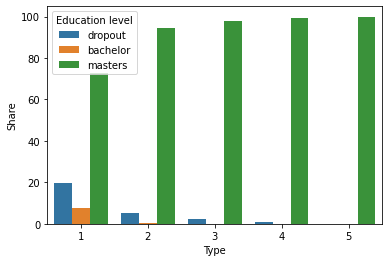

In [144]:
stats_df = pd.DataFrame(data=[dropout_shares, bachelor_shares, masters_shares], columns=['1', '2', '3', '4', '5'], index=['dropout', 'bachelor', 'masters'])

stats_df_long = stats_df.reset_index().melt(id_vars='index', var_name='category', value_name='value')

# Rename the columns
stats_df_long.columns = ['Education level', 'Type', 'Share']

# Plot the data
sns.barplot(data=stats_df_long, x='Type', y='Share', hue='Education level')

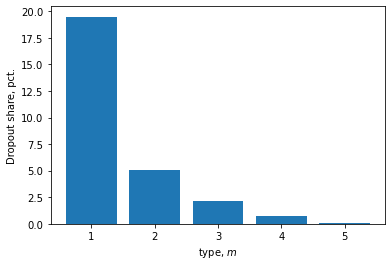

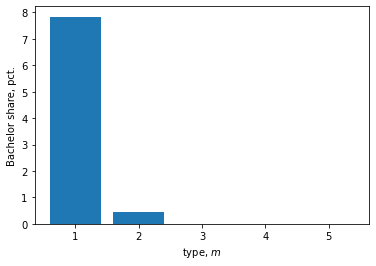

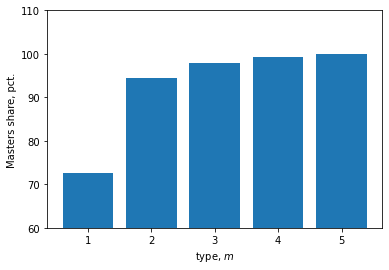

In [145]:
#Seperate plots

fig, ax = plt.subplots()
ax.bar(range(1,(par.Nm+1)),dropout_shares)
ax.set(xlabel='type, $m$',ylabel='Dropout share, pct.');

fig, ax = plt.subplots()
ax.bar(range(1,(par.Nm+1)),bachelor_shares)
ax.set(xlabel='type, $m$',ylabel='Bachelor share, pct.');

fig, ax = plt.subplots()
ax.bar(range(1,(par.Nm+1)),masters_shares)
ax.set(xlabel='type, $m$',ylabel='Masters share, pct.')
ax.set_ylim(60,110);

## How many takes slutloans?


In [146]:
slutloan = np.zeros(par.Nm)

#type 0
slutloan_0 = np.zeros(len(m_0))

for idx, i in enumerate(m_0):
        slutloan_0[idx] = model_reform1.sim.g[i,par.t_ls-1]>0.000001

slutloan[0] = np.sum(slutloan_0)/len(m_0)*100

#type 1
slutloan_1 = np.zeros(len(m_1))

for idx, i in enumerate(m_1):
        slutloan_1[idx] = model_reform1.sim.g[i,par.t_ls-1]>0.000001

slutloan[1] = np.sum(slutloan_1)/len(m_1)*100

#type 2
slutloan_2 = np.zeros(len(m_2))

for idx, i in enumerate(m_2):
        slutloan_2[idx] = model_reform1.sim.g[i,par.t_ls-1]>0.000001

slutloan[2] = np.sum(slutloan_2)/len(m_2)*100

#type 3
slutloan_3 = np.zeros(len(m_3))

for idx, i in enumerate(m_3):
        slutloan_3[idx] = model_reform1.sim.g[i,par.t_ls-1]>0.000001

slutloan[3] = np.sum(slutloan_3)/len(m_3)*100

#type 4
slutloan_4 = np.zeros(len(m_4))

for idx, i in enumerate(m_4):
        slutloan_4[idx] = model_reform1.sim.g[i,par.t_ls-1]>0.000001

slutloan[4] = np.sum(slutloan_4)/len(m_4)*100

In [147]:
slutloan

array([76.571894, 94.92768 , 97.871915, 61.811102, 28.833929])

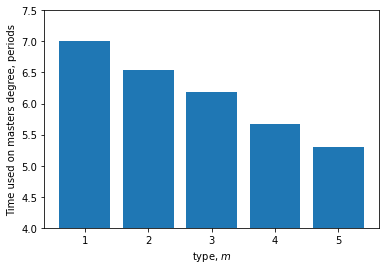

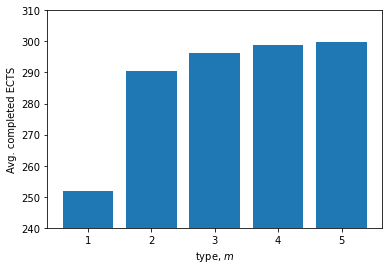

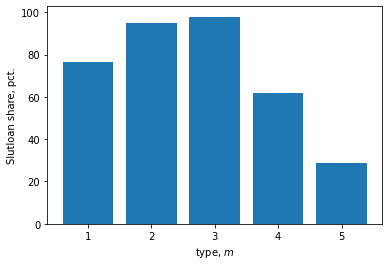

In [148]:
fig, ax = plt.subplots()
ax.bar(range(1,(par.Nm+1)),time,bottom=0)
ax.set(xlabel='type, $m$',ylabel='Time used on masters degree, periods')
ax.set_ylim([4, 7.5]);

fig, ax = plt.subplots()
ax.bar(range(1,(par.Nm+1)),ects)
ax.set(xlabel='type, $m$',ylabel='Avg. completed ECTS')
ax.set_ylim([240, 310]);

fig, ax = plt.subplots()
ax.bar(range(1,(par.Nm+1)),slutloan)
ax.set(xlabel='type, $m$',ylabel='Slutloan share, pct.');

fig, ax = plt.subplots()
ax.bar(range(1,(par.Nm+1)),utility)
ax.set(xlabel='type, $m$',ylabel='Avg. discounted utility');



# Ingen SU på kandidaten

In [48]:
from ingen_su_kandidat import IngenSUKandidatClass

In [49]:
# def zero_budget2(tax):
#     ingen_su_model = IngenSUKandidatClass(par={'r':0.02,'beta':0.98,'Nm':5,'upsilon':1.05,'rho':12.0,'gamma_max':0.012,'gamma_min':0.019,'tau':5,'tax':tax,'su':0.16,'sigma_s':0.3,'sigma_w':0.1})
#     ingen_su_model.solve()
#     ingen_su_model.sim.a_init[:]=0.0
#     ingen_su_model.sim.e_init[:]=0.0
#     ingen_su_model.simulate()
#     return ((np.sum(0.4*np.mean(ingen_su_model.sim.income[:,:-1],axis=0)) - (np.sum(np.mean(ingen_su_model.sim.su[:,:-1],axis=0))))-(np.sum(0.4*np.mean(base_model_sim.sim.income[:,:-1],axis=0)) - (np.sum(np.mean(base_model_sim.sim.su[:,:-1],axis=0)))))

# res2 = optimize.root_scalar(zero_budget2, bracket=[0.1, 0.5], method='brentq')

In [50]:
#print(res2)

In [51]:
ingen_su_model = IngenSUKandidatClass(par={'r':0.02,'beta':0.98,'Nm':5,'upsilon':1.05,'rho':12.0,'gamma_max':0.012,'gamma_min':0.019,'tau':5,'tax':0.4,'su':0.16,'sigma_s':0.3,'sigma_w':0.1})

par = ingen_su_model.par
sol = ingen_su_model.sol
sim = ingen_su_model.sim

In [52]:
%time ingen_su_model.solve()

48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
CPU times: user 7min 54s, sys: 6.31 s, total: 8min
Wall time: 8min 30s


In [53]:
ingen_su_model.sim.a_init[:] = 0.0
ingen_su_model.sim.e_init[:] = 0
ingen_su_model.simulate()

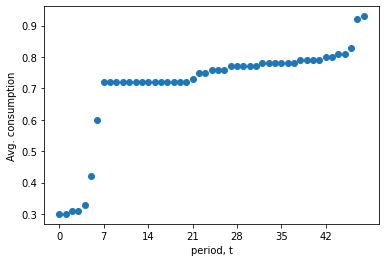

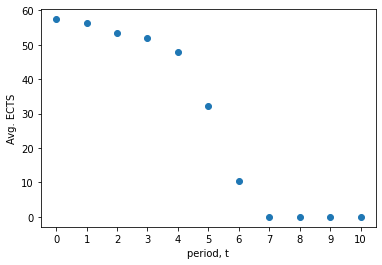

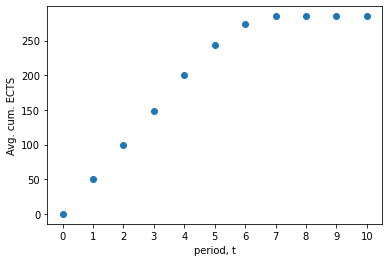

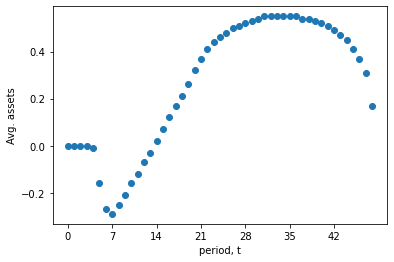

In [54]:
#Simulation graphs
fig, ax = plt.subplots()
ax.scatter(range(par.simT),np.around(np.mean(ingen_su_model.sim.c,axis=0),decimals=2))
ax.set(xlabel='period, t',ylabel='Avg. consumption',xticks=range(0,par.simT,7));

fig, ax = plt.subplots()
ax.scatter(range(par.t_ls+5),np.around(np.mean(ingen_su_model.sim.g[:,0:par.t_ls+5],axis=0),decimals=2))
ax.set(xlabel='period, t',ylabel='Avg. ECTS',xticks=range(par.t_ls+5));

fig, ax = plt.subplots()
ax.scatter(range(par.t_ls+5),np.around(np.mean(ingen_su_model.sim.G[:,0:par.t_ls+5],axis=0),decimals=2))
ax.set(xlabel='period, t',ylabel='Avg. cum. ECTS',xticks=range(par.t_ls+5));

fig, ax = plt.subplots()
ax.scatter(range(par.simT),np.around(np.mean(ingen_su_model.sim.a,axis=0),decimals=2))
ax.set(xlabel='period, t',ylabel='Avg. assets',xticks=range(0,par.simT,7));

## Avg. utility sum

In [159]:
np.sum(np.mean(ingen_su_model.sim.V, axis=0))

-48.29025774922743

## Types

In [55]:
time = np.zeros(par.Nm)

In [56]:
m_0 = []
m_1 = []
m_2 = []
m_3 = []
m_4 = []

for i_idx, i in enumerate(ingen_su_model.sim.m_init):
    
    if i == 0:
        m_0.append(i_idx)
    
    if i == 1:
        m_1.append(i_idx)
    
    if i == 2:
        m_2.append(i_idx)
    
    if i == 3:
        m_3.append(i_idx)
    
    if i == 4:
        m_4.append(i_idx)


In [160]:
utility = np.zeros(par.Nm)

util_0 = []
for i in m_0:
    util_0.append(np.sum(ingen_su_model.sim.V[i,:]))

utility[0] = np.mean(util_0)

util_1 = []
for i in m_1:
    util_1.append(np.sum(ingen_su_model.sim.V[i,:]))

utility[1] = np.mean(util_1)

util_2 = []
for i in m_2:
    util_2.append(np.sum(ingen_su_model.sim.V[i,:]))

utility[2] = np.mean(util_2)

util_3 = []
for i in m_3:
    util_3.append(np.sum(ingen_su_model.sim.V[i,:]))

utility[3] = np.mean(util_3)

util_4 = []
for i in m_4:
    util_4.append(np.sum(ingen_su_model.sim.V[i,:]))

utility[4] = np.mean(util_4)

print(utility)



[-48.231035 -48.295206 -48.286857 -48.324364 -48.312471]


## Average completion time

In [57]:
#type 0
study_0 = np.zeros(len(m_0))

for idx, i in enumerate(m_0):
        if ingen_su_model.sim.G[i,par.T-1] < 299:
                study_0[idx] = np.NaN
        else:
                study_0[idx] = np.sum(ingen_su_model.sim.g[i,:]>0.000001)

time[0] = np.nanmean(study_0)

#type 1
study_1 = np.zeros(len(m_1))

for idx, i in enumerate(m_1):
        if ingen_su_model.sim.G[i,par.T-1] < 299:
                study_1[idx] = np.NaN
        else:
                study_1[idx] = np.sum(ingen_su_model.sim.g[i,:]>0.000001)

time[1] = np.nanmean(study_1)

#type 2
study_2 = np.zeros(len(m_2))

for idx, i in enumerate(m_2):
        if ingen_su_model.sim.G[i,par.T-1] < 299:
                study_2[idx] = np.NaN
        else:
                study_2[idx] = np.sum(ingen_su_model.sim.g[i,:]>0.000001)

time[2] = np.nanmean(study_2)

#type 3
study_3 = np.zeros(len(m_3))

for idx, i in enumerate(m_3):
        if ingen_su_model.sim.G[i,par.T-1] < 299:
                study_3[idx] = np.NaN
        else:
                study_3[idx] = np.sum(ingen_su_model.sim.g[i,:]>0.000001)

time[3] = np.nanmean(study_3)

#type 4
study_4 = np.zeros(len(m_4))

for idx, i in enumerate(m_4):
        if ingen_su_model.sim.G[i,par.T-1] < 299:
                study_4[idx] = np.NaN
        else:
                study_4[idx] = np.sum(ingen_su_model.sim.g[i,:]>0.000001)

time[4] = np.nanmean(study_4)

print(time)


[7.       6.563636 6.20057  5.654038 5.357065]


# Average completed ECTS points

In [58]:
ects = np.zeros(par.Nm)

list_0 = []
for i in m_0:
    list_0.append(ingen_su_model.sim.G[i,par.T-1])

ects[0] = np.mean(list_0)

list_1 = []
for i in m_1:
    list_1.append(ingen_su_model.sim.G[i,par.T-1])

ects[1] = np.mean(list_1)

list_2 = []
for i in m_2:
    list_2.append(ingen_su_model.sim.G[i,par.T-1])

ects[2] = np.mean(list_2)

list_3 = []
for i in m_3:
    list_3.append(ingen_su_model.sim.G[i,par.T-1])

ects[3] = np.mean(list_3)

list_4 = []
for i in m_4:
    list_4.append(ingen_su_model.sim.G[i,par.T-1])

ects[4] = np.mean(list_4)

print(ects)



[240.935476 289.300182 296.377381 298.607357 299.677473]


## How many: drop out, bachelors degree, masters degree

In [59]:
dropout_0=0
dropout_1=0
dropout_2=0
dropout_3=0
dropout_4=0

bachelor_0=0
bachelor_1=0
bachelor_2=0
bachelor_3=0
bachelor_4=0

masters_0=0
masters_1=0
masters_2=0
masters_3=0
masters_4=0

In [60]:
dropout_counts = []
bachelor_counts = []
masters_counts = []

for lst, dropout_count, bachelor_count, masters_count in zip([list_0, list_1, list_2, list_3, list_4], 
                                                              [dropout_0, dropout_1, dropout_2, dropout_3, dropout_4], 
                                                              [bachelor_0, bachelor_1, bachelor_2, bachelor_3, bachelor_4], 
                                                              [masters_0, masters_1, masters_2, masters_3, masters_4]):
    dropout_counts.append(dropout_count)
    bachelor_counts.append(bachelor_count)
    masters_counts.append(masters_count)

    for i in lst:
        if i < par.bachelor:
            dropout_counts[-1] += 1
        if par.bachelor <= i < par.complete - 1e-5:
            bachelor_counts[-1] += 1
        if par.complete-1e-5<=i:
            masters_counts[-1] += 1

dropout_shares = [count / len(lst) * 100 for count, lst in zip(dropout_counts, [list_0, list_1, list_2, list_3, list_4])]
bachelor_shares = [count / len(lst) * 100 for count, lst in zip(bachelor_counts, [list_0, list_1, list_2, list_3, list_4])]
masters_shares = [count / len(lst) * 100 for count, lst in zip(masters_counts, [list_0, list_1, list_2, list_3, list_4])]

In [61]:
print(dropout_shares)
print(bachelor_shares)
print(masters_shares)

[20.460024106066694, 5.713144226927687, 2.0239282153539384, 0.7981410385936553, 0.1880443388756928]
[15.618722378465247, 0.3495805033959249, 0.0, 0.0, 0.0]
[63.92125351546806, 93.93727526967639, 97.97607178464605, 99.20185896140634, 99.8119556611243]


<AxesSubplot:xlabel='Type', ylabel='Share'>

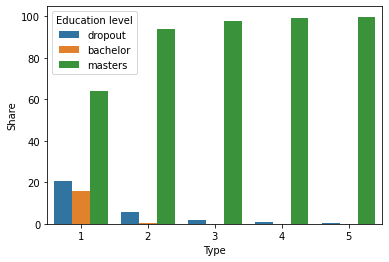

In [62]:
stats_df = pd.DataFrame(data=[dropout_shares, bachelor_shares, masters_shares], columns=['1', '2', '3', '4', '5'], index=['dropout', 'bachelor', 'masters'])

stats_df_long = stats_df.reset_index().melt(id_vars='index', var_name='category', value_name='value')

# Rename the columns
stats_df_long.columns = ['Education level', 'Type', 'Share']

# Plot the data
sns.barplot(data=stats_df_long, x='Type', y='Share', hue='Education level')

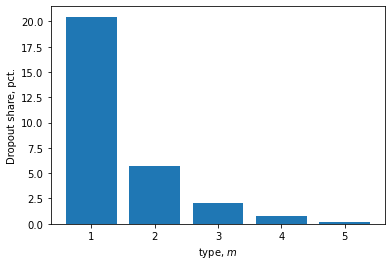

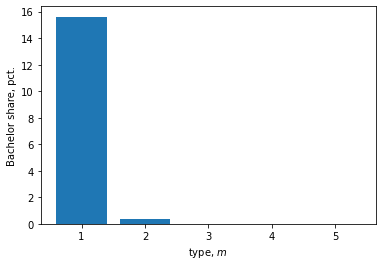

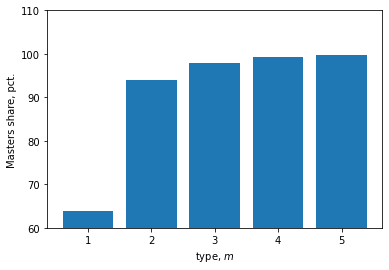

In [63]:
#Seperate plots

fig, ax = plt.subplots()
ax.bar(range(1,(par.Nm+1)),dropout_shares)
ax.set(xlabel='type, $m$',ylabel='Dropout share, pct.');

fig, ax = plt.subplots()
ax.bar(range(1,(par.Nm+1)),bachelor_shares)
ax.set(xlabel='type, $m$',ylabel='Bachelor share, pct.');

fig, ax = plt.subplots()
ax.bar(range(1,(par.Nm+1)),masters_shares)
ax.set(xlabel='type, $m$',ylabel='Masters share, pct.')
ax.set_ylim(60,110);

## How many takes slutloans?


In [64]:
# slutloan = np.zeros(par.Nm)

# #type 0
# slutloan_0 = np.zeros(len(m_0))

# for idx, i in enumerate(m_0):
#         slutloan_0[idx] = ingen_su_model.sim.g[i,par.t_ls]>0.000001

# slutloan[0] = np.sum(slutloan_0)/len(m_0)*100

# #type 1
# slutloan_1 = np.zeros(len(m_1))

# for idx, i in enumerate(m_1):
#         slutloan_1[idx] = ingen_su_model.sim.g[i,par.t_ls]>0.000001

# slutloan[1] = np.sum(slutloan_1)/len(m_1)*100

# #type 2
# slutloan_2 = np.zeros(len(m_2))

# for idx, i in enumerate(m_2):
#         slutloan_2[idx] = ingen_su_model.sim.g[i,par.t_ls]>0.000001

# slutloan[2] = np.sum(slutloan_2)/len(m_2)*100

# #type 3
# slutloan_3 = np.zeros(len(m_3))

# for idx, i in enumerate(m_3):
#         slutloan_3[idx] = ingen_su_model.sim.g[i,par.t_ls]>0.000001

# slutloan[3] = np.sum(slutloan_3)/len(m_3)*100

# #type 4
# slutloan_4 = np.zeros(len(m_4))

# for idx, i in enumerate(m_4):
#         slutloan_4[idx] = ingen_su_model.sim.g[i,par.t_ls]>0.000001

# slutloan[4] = np.sum(slutloan_4)/len(m_4)*100

In [65]:
# slutloan

array([65.407794, 53.126249, 19.651047,  4.546373,  0.712589])

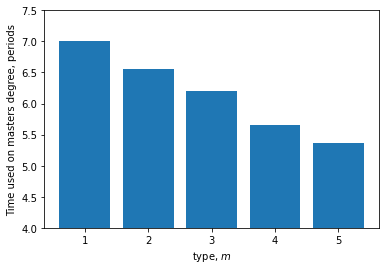

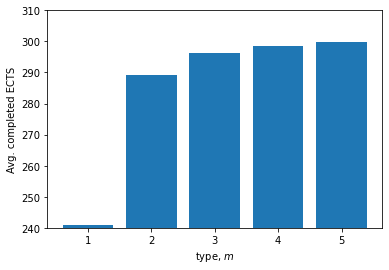

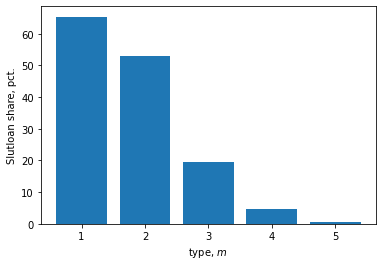

In [66]:
fig, ax = plt.subplots()
ax.bar(range(1,(par.Nm+1)),time,bottom=0)
ax.set(xlabel='type, $m$',ylabel='Time used on masters degree, periods')
ax.set_ylim([4, 7.5]);

fig, ax = plt.subplots()
ax.bar(range(1,(par.Nm+1)),ects)
ax.set(xlabel='type, $m$',ylabel='Avg. completed ECTS')
ax.set_ylim([240, 310]);

fig, ax = plt.subplots()
ax.bar(range(1,(par.Nm+1)),utility)
ax.set(xlabel='type, $m$',ylabel='Avg. discounted utility');

# fig, ax = plt.subplots()
# ax.bar(range(1,(par.Nm+1)),slutloan)
# ax.set(xlabel='type, $m$',ylabel='Slutloan share, pct.');



# Højere SU på kandidaten

In [67]:
from dobbelt_su_kandidat import DobbeltSUKandidatClass

In [68]:
# def zero_budget3(tax):
#     dobbelt_su_model = DobbeltSUKandidatClass(par={'r':0.02,'beta':0.98,'Nm':5,'upsilon':1.05,'rho':12.0,'gamma_max':0.012,'gamma_min':0.019,'tau':5,'tax':tax,'su':0.16,'sigma_s':0.3,'sigma_w':0.1})
#     dobbelt_su_model.solve()
#     dobbelt_su_model.sim.a_init[:]=0.0
#     dobbelt_su_model.sim.e_init[:]=0.0
#     dobbelt_su_model.simulate()
#     return ((np.sum(0.4*np.mean(dobbelt_su_model.sim.income[:,:-1],axis=0)) - (np.sum(np.mean(dobbelt_su_model.sim.su[:,:-1],axis=0))))-(np.sum(0.4*np.mean(base_model_sim.sim.income[:,:-1],axis=0)) - (np.sum(np.mean(base_model_sim.sim.su[:,:-1],axis=0)))))

# res3 = optimize.root_scalar(zero_budget3, bracket=[0.3, 0.7], method='brentq')

In [69]:
#print(res3)

In [70]:
dobbelt_su_model = DobbeltSUKandidatClass(par={'r':0.02,'beta':0.98,'Nm':5,'upsilon':1.05,'rho':12.0,'gamma_max':0.012,'gamma_min':0.019,'tau':5,'tax':0.4,'su':0.16,'sigma_s':0.3,'sigma_w':0.1})

par = dobbelt_su_model.par
sol = dobbelt_su_model.sol
sim = dobbelt_su_model.sim

In [71]:
%time dobbelt_su_model.solve()

48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
CPU times: user 9min 6s, sys: 6.42 s, total: 9min 12s
Wall time: 9min 41s


In [72]:
dobbelt_su_model.sim.a_init[:] = 0.0
dobbelt_su_model.sim.e_init[:] = 0
dobbelt_su_model.simulate()

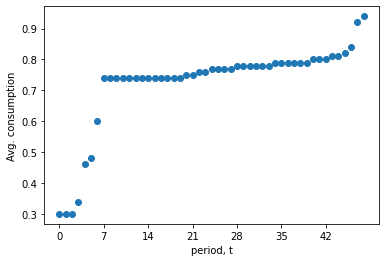

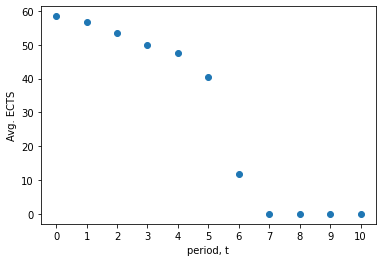

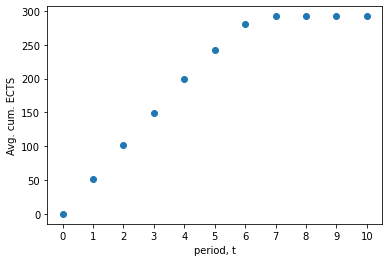

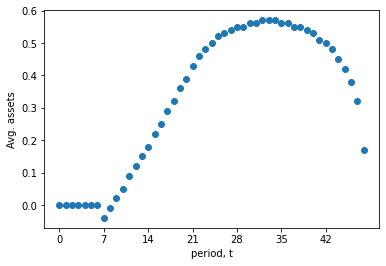

In [73]:
#Simulation graphs
fig, ax = plt.subplots()
ax.scatter(range(par.simT),np.around(np.mean(dobbelt_su_model.sim.c,axis=0),decimals=2))
ax.set(xlabel='period, t',ylabel='Avg. consumption',xticks=range(0,par.simT,7));

fig, ax = plt.subplots()
ax.scatter(range(par.t_ls+5),np.around(np.mean(dobbelt_su_model.sim.g[:,0:par.t_ls+5],axis=0),decimals=2))
ax.set(xlabel='period, t',ylabel='Avg. ECTS',xticks=range(par.t_ls+5));

fig, ax = plt.subplots()
ax.scatter(range(par.t_ls+5),np.around(np.mean(dobbelt_su_model.sim.G[:,0:par.t_ls+5],axis=0),decimals=2))
ax.set(xlabel='period, t',ylabel='Avg. cum. ECTS',xticks=range(par.t_ls+5));

fig, ax = plt.subplots()
ax.scatter(range(par.simT),np.around(np.mean(dobbelt_su_model.sim.a,axis=0),decimals=2))
ax.set(xlabel='period, t',ylabel='Avg. assets',xticks=range(0,par.simT,7));

## Avg. utility

In [162]:
np.sum(np.mean(dobbelt_su_model.sim.V, axis=0))

-45.757482871725045

## Types

In [74]:
time = np.zeros(par.Nm)

In [75]:
m_0 = []
m_1 = []
m_2 = []
m_3 = []
m_4 = []

for i_idx, i in enumerate(dobbelt_su_model.sim.m_init):
    
    if i == 0:
        m_0.append(i_idx)
    
    if i == 1:
        m_1.append(i_idx)
    
    if i == 2:
        m_2.append(i_idx)
    
    if i == 3:
        m_3.append(i_idx)
    
    if i == 4:
        m_4.append(i_idx)


In [163]:
utility = np.zeros(par.Nm)

util_0 = []
for i in m_0:
    util_0.append(np.sum(dobbelt_su_model.sim.V[i,:]))

utility[0] = np.mean(util_0)

util_1 = []
for i in m_1:
    util_1.append(np.sum(dobbelt_su_model.sim.V[i,:]))

utility[1] = np.mean(util_1)

util_2 = []
for i in m_2:
    util_2.append(np.sum(dobbelt_su_model.sim.V[i,:]))

utility[2] = np.mean(util_2)

util_3 = []
for i in m_3:
    util_3.append(np.sum(dobbelt_su_model.sim.V[i,:]))

utility[3] = np.mean(util_3)

util_4 = []
for i in m_4:
    util_4.append(np.sum(dobbelt_su_model.sim.V[i,:]))

utility[4] = np.mean(util_4)

print(utility)



[-45.705957 -45.762093 -45.740473 -45.811751 -45.766004]


## Average completion time

In [76]:
#type 0
study_0 = np.zeros(len(m_0))

for idx, i in enumerate(m_0):
        if dobbelt_su_model.sim.G[i,par.T-1] < 299:
                study_0[idx] = np.NaN
        else:
                study_0[idx] = np.sum(dobbelt_su_model.sim.g[i,:]>0.000001)

time[0] = np.nanmean(study_0)

#type 1
study_1 = np.zeros(len(m_1))

for idx, i in enumerate(m_1):
        if dobbelt_su_model.sim.G[i,par.T-1] < 299:
                study_1[idx] = np.NaN
        else:
                study_1[idx] = np.sum(dobbelt_su_model.sim.g[i,:]>0.000001)

time[1] = np.nanmean(study_1)

#type 2
study_2 = np.zeros(len(m_2))

for idx, i in enumerate(m_2):
        if dobbelt_su_model.sim.G[i,par.T-1] < 299:
                study_2[idx] = np.NaN
        else:
                study_2[idx] = np.sum(dobbelt_su_model.sim.g[i,:]>0.000001)

time[2] = np.nanmean(study_2)

#type 3
study_3 = np.zeros(len(m_3))

for idx, i in enumerate(m_3):
        if dobbelt_su_model.sim.G[i,par.T-1] < 299:
                study_3[idx] = np.NaN
        else:
                study_3[idx] = np.sum(dobbelt_su_model.sim.g[i,:]>0.000001)

time[3] = np.nanmean(study_3)

#type 4
study_4 = np.zeros(len(m_4))

for idx, i in enumerate(m_4):
        if dobbelt_su_model.sim.G[i,par.T-1] < 299:
                study_4[idx] = np.NaN
        else:
                study_4[idx] = np.sum(dobbelt_su_model.sim.g[i,:]>0.000001)

time[4] = np.nanmean(study_4)

print(time)


[7.       6.518286 6.190162 6.044471 5.787721]


# Average completed ECTS points

In [77]:
ects = np.zeros(par.Nm)

list_0 = []
for i in m_0:
    list_0.append(dobbelt_su_model.sim.G[i,par.T-1])

ects[0] = np.mean(list_0)

list_1 = []
for i in m_1:
    list_1.append(dobbelt_su_model.sim.G[i,par.T-1])

ects[1] = np.mean(list_1)

list_2 = []
for i in m_2:
    list_2.append(dobbelt_su_model.sim.G[i,par.T-1])

ects[2] = np.mean(list_2)

list_3 = []
for i in m_3:
    list_3.append(dobbelt_su_model.sim.G[i,par.T-1])

ects[3] = np.mean(list_3)

list_4 = []
for i in m_4:
    list_4.append(dobbelt_su_model.sim.G[i,par.T-1])

ects[4] = np.mean(list_4)

print(ects)



[273.575713 291.238104 296.340501 299.321092 299.726934]


## How many: drop out, bachelors degree, masters degree

In [78]:
dropout_0=0
dropout_1=0
dropout_2=0
dropout_3=0
dropout_4=0

bachelor_0=0
bachelor_1=0
bachelor_2=0
bachelor_3=0
bachelor_4=0

masters_0=0
masters_1=0
masters_2=0
masters_3=0
masters_4=0

In [79]:
dropout_counts = []
bachelor_counts = []
masters_counts = []

for lst, dropout_count, bachelor_count, masters_count in zip([list_0, list_1, list_2, list_3, list_4], 
                                                              [dropout_0, dropout_1, dropout_2, dropout_3, dropout_4], 
                                                              [bachelor_0, bachelor_1, bachelor_2, bachelor_3, bachelor_4], 
                                                              [masters_0, masters_1, masters_2, masters_3, masters_4]):
    dropout_counts.append(dropout_count)
    bachelor_counts.append(bachelor_count)
    masters_counts.append(masters_count)

    for i in lst:
        if i < par.bachelor:
            dropout_counts[-1] += 1
        if par.bachelor <= i < par.complete - 1e-5:
            bachelor_counts[-1] += 1
        if par.complete-1e-5<=i:
            masters_counts[-1] += 1

dropout_shares = [count / len(lst) * 100 for count, lst in zip(dropout_counts, [list_0, list_1, list_2, list_3, list_4])]
bachelor_shares = [count / len(lst) * 100 for count, lst in zip(bachelor_counts, [list_0, list_1, list_2, list_3, list_4])]
masters_shares = [count / len(lst) * 100 for count, lst in zip(masters_counts, [list_0, list_1, list_2, list_3, list_4])]

In [80]:
print(dropout_shares)
print(bachelor_shares)
print(masters_shares)

[12.340255591054312, 4.789291026276649, 2.079967689822294, 0.38393384524512697, 0.15248551387618176]
[3.125, 0.3173029251363411, 0.010096930533117932, 0.0, 0.0]
[84.53474440894568, 94.89340604858701, 97.90993537964458, 99.61606615475486, 99.84751448612383]


<AxesSubplot:xlabel='Type', ylabel='Share'>

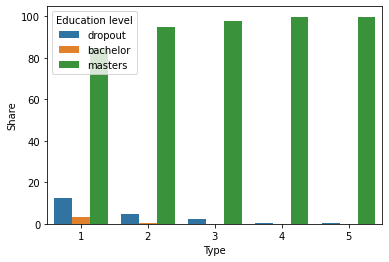

In [81]:
stats_df = pd.DataFrame(data=[dropout_shares, bachelor_shares, masters_shares], columns=['1', '2', '3', '4', '5'], index=['dropout', 'bachelor', 'masters'])

stats_df_long = stats_df.reset_index().melt(id_vars='index', var_name='category', value_name='value')

# Rename the columns
stats_df_long.columns = ['Education level', 'Type', 'Share']

# Plot the data
sns.barplot(data=stats_df_long, x='Type', y='Share', hue='Education level')

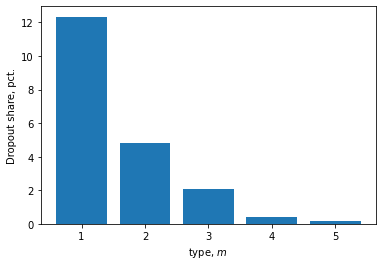

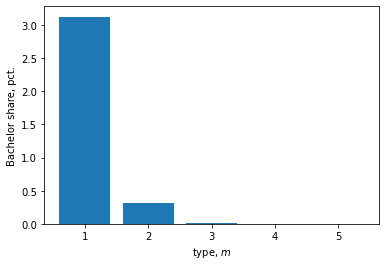

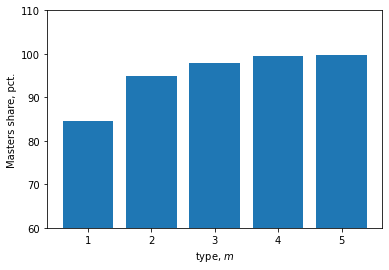

In [82]:
#Seperate plots

fig, ax = plt.subplots()
ax.bar(range(1,(par.Nm+1)),dropout_shares)
ax.set(xlabel='type, $m$',ylabel='Dropout share, pct.');

fig, ax = plt.subplots()
ax.bar(range(1,(par.Nm+1)),bachelor_shares)
ax.set(xlabel='type, $m$',ylabel='Bachelor share, pct.');

fig, ax = plt.subplots()
ax.bar(range(1,(par.Nm+1)),masters_shares)
ax.set(xlabel='type, $m$',ylabel='Masters share, pct.')
ax.set_ylim(60,110);

## How many takes slutloans?


In [83]:
slutloan = np.zeros(par.Nm)

#type 0
slutloan_0 = np.zeros(len(m_0))

for idx, i in enumerate(m_0):
        slutloan_0[idx] = dobbelt_su_model.sim.g[i,par.t_ls]>0.000001

slutloan[0] = np.sum(slutloan_0)/len(m_0)*100

#type 1
slutloan_1 = np.zeros(len(m_1))

for idx, i in enumerate(m_1):
        slutloan_1[idx] = dobbelt_su_model.sim.g[i,par.t_ls]>0.000001

slutloan[1] = np.sum(slutloan_1)/len(m_1)*100

#type 2
slutloan_2 = np.zeros(len(m_2))

for idx, i in enumerate(m_2):
        slutloan_2[idx] = dobbelt_su_model.sim.g[i,par.t_ls]>0.000001

slutloan[2] = np.sum(slutloan_2)/len(m_2)*100

#type 3
slutloan_3 = np.zeros(len(m_3))

for idx, i in enumerate(m_3):
        slutloan_3[idx] = dobbelt_su_model.sim.g[i,par.t_ls]>0.000001

slutloan[3] = np.sum(slutloan_3)/len(m_3)*100

#type 4
slutloan_4 = np.zeros(len(m_4))

for idx, i in enumerate(m_4):
        slutloan_4[idx] = dobbelt_su_model.sim.g[i,par.t_ls]>0.000001

slutloan[4] = np.sum(slutloan_4)/len(m_4)*100

In [84]:
slutloan

array([85.952476, 49.340605, 18.61874 ,  4.430006,  0.660771])

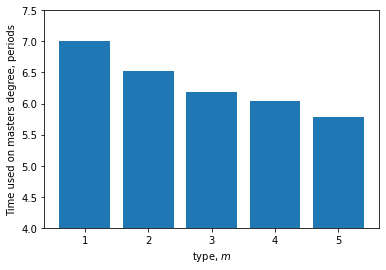

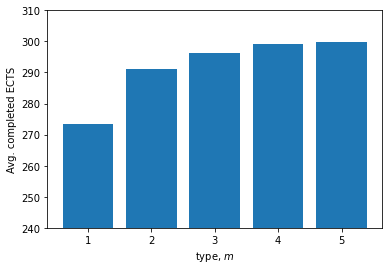

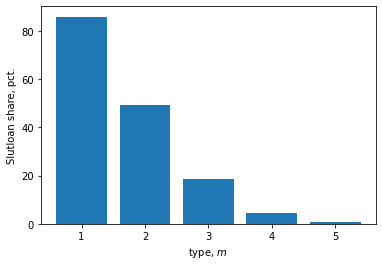

In [85]:
fig, ax = plt.subplots()
ax.bar(range(1,(par.Nm+1)),time,bottom=0)
ax.set(xlabel='type, $m$',ylabel='Time used on masters degree, periods')
ax.set_ylim([4, 7.5]);

fig, ax = plt.subplots()
ax.bar(range(1,(par.Nm+1)),ects)
ax.set(xlabel='type, $m$',ylabel='Avg. completed ECTS')
ax.set_ylim([240, 310]);

fig, ax = plt.subplots()
ax.bar(range(1,(par.Nm+1)),slutloan)
ax.set(xlabel='type, $m$',ylabel='Slutloan share, pct.');

fig, ax = plt.subplots()
ax.bar(range(1,(par.Nm+1)),utility)
ax.set(xlabel='type, $m$',ylabel='Avg. discounted utility');



# Kun SU til lave typer

In [86]:
from su_til_fattige import SUTilFattigeClass

In [87]:
# def zero_budget4(tax):
#     su_fattig_model = SUTilFattigeClass(par={'r':0.02,'beta':0.98,'Nm':5,'upsilon':1.05,'rho':12.0,'gamma_max':0.012,'gamma_min':0.019,'tau':5,'tax':tax,'su':0.16,'sigma_s':0.3,'sigma_w':0.1})
#     su_fattig_model.solve()
#     su_fattig_model.sim.a_init[:]=0.0
#     su_fattig_model.sim.e_init[:]=0.0
#     su_fattig_model.simulate()
#     return ((np.sum(0.4*np.mean(su_fattig_model.sim.income[:,:-1],axis=0)) - (np.sum(np.mean(su_fattig_model.sim.su[:,:-1],axis=0))))-(np.sum(0.4*np.mean(base_model_sim.sim.income[:,:-1],axis=0)) - (np.sum(np.mean(base_model_sim.sim.su[:,:-1],axis=0)))))

# res4 = optimize.root_scalar(zero_budget4, bracket=[0.2, 0.5], method='brentq')

In [88]:
# print(res4)

In [89]:
su_fattig_model = SUTilFattigeClass(par={'r':0.02,'beta':0.98,'Nm':5,'upsilon':1.05,'rho':12.0,'gamma_max':0.012,'gamma_min':0.019,'tau':5,'tax':0.4,'su':0.16,'sigma_s':0.3,'sigma_w':0.1})
#su_fattig_model = SUTilFattigeClass(par={'r':0.02,'beta':0.98,'Nm':5,'upsilon':1.05,'rho':12.0,'gamma_max':0.012,'gamma_min':0.019,'tau':5,'tax':0.4,'su':0.16,'sigma_s':0.3,'sigma_w':0.1})

par = su_fattig_model.par
sol = su_fattig_model.sol


In [90]:
sim = su_fattig_model.sim

In [91]:
%time su_fattig_model.solve()

48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
CPU times: user 8min 21s, sys: 6.24 s, total: 8min 27s
Wall time: 9min 2s


In [92]:
#su_fattig_model.sim.m_init[:] = 0
su_fattig_model.sim.a_init[:] = 0.0
su_fattig_model.sim.e_init[:] = 0
su_fattig_model.simulate()

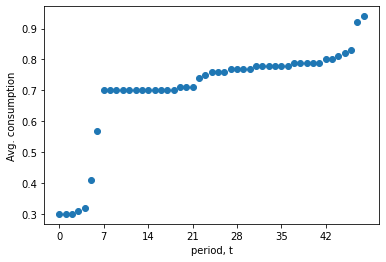

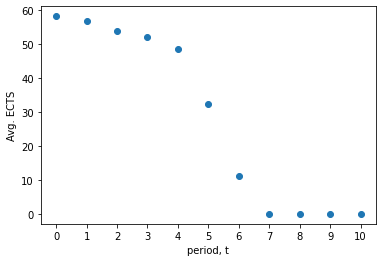

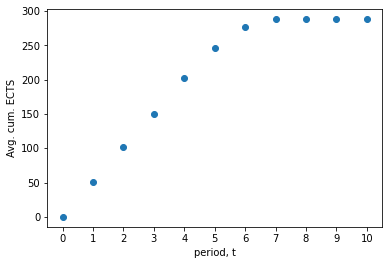

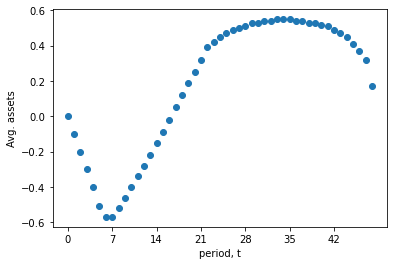

In [93]:
#Simulation graphs
fig, ax = plt.subplots()
ax.scatter(range(par.simT),np.around(np.mean(su_fattig_model.sim.c,axis=0),decimals=2))
ax.set(xlabel='period, t',ylabel='Avg. consumption',xticks=range(0,par.simT,7));

fig, ax = plt.subplots()
ax.scatter(range(par.t_ls+5),np.around(np.mean(su_fattig_model.sim.g[:,0:par.t_ls+5],axis=0),decimals=2))
ax.set(xlabel='period, t',ylabel='Avg. ECTS',xticks=range(par.t_ls+5));

fig, ax = plt.subplots()
ax.scatter(range(par.t_ls+5),np.around(np.mean(su_fattig_model.sim.G[:,0:par.t_ls+5],axis=0),decimals=2))
ax.set(xlabel='period, t',ylabel='Avg. cum. ECTS',xticks=range(par.t_ls+5));

fig, ax = plt.subplots()
ax.scatter(range(par.simT),np.around(np.mean(su_fattig_model.sim.a,axis=0),decimals=2))
ax.set(xlabel='period, t',ylabel='Avg. assets',xticks=range(0,par.simT,7));

## Avg utility

In [165]:
np.sum(np.mean(su_fattig_model.sim.V, axis=0))

-48.80822330488521

## Types

In [94]:
time = np.zeros(par.Nm)

In [95]:
m_0 = []
m_1 = []
m_2 = []
m_3 = []
m_4 = []

for i_idx, i in enumerate(su_fattig_model.sim.m_init):
    
    if i == 0:
        m_0.append(i_idx)
    
    if i == 1:
        m_1.append(i_idx)
    
    if i == 2:
        m_2.append(i_idx)
    
    if i == 3:
        m_3.append(i_idx)
    
    if i == 4:
        m_4.append(i_idx)


In [167]:
utility = np.zeros(par.Nm)

util_0 = []
for i in m_0:
    util_0.append(np.sum(su_fattig_model.sim.V[i,:]))

utility[0] = np.mean(util_0)

util_1 = []
for i in m_1:
    util_1.append(np.sum(su_fattig_model.sim.V[i,:]))

utility[1] = np.mean(util_1)

util_2 = []
for i in m_2:
    util_2.append(np.sum(su_fattig_model.sim.V[i,:]))

utility[2] = np.mean(util_2)

util_3 = []
for i in m_3:
    util_3.append(np.sum(su_fattig_model.sim.V[i,:]))

utility[3] = np.mean(util_3)

util_4 = []
for i in m_4:
    util_4.append(np.sum(su_fattig_model.sim.V[i,:]))

utility[4] = np.mean(util_4)

print(utility)



[-48.774378 -48.807008 -48.828484 -48.821379 -48.809201]


## Average completion time

In [96]:
#type 0
study_0 = np.zeros(len(m_0))

for idx, i in enumerate(m_0):
        if su_fattig_model.sim.G[i,par.T-1] < 299:
                study_0[idx] = np.NaN
        else:
                study_0[idx] = np.sum(su_fattig_model.sim.g[i,:]>0.000001)

time[0] = np.nanmean(study_0)

#type 1
study_1 = np.zeros(len(m_1))

for idx, i in enumerate(m_1):
        if su_fattig_model.sim.G[i,par.T-1] < 299:
                study_1[idx] = np.NaN
        else:
                study_1[idx] = np.sum(su_fattig_model.sim.g[i,:]>0.000001)

time[1] = np.nanmean(study_1)

#type 2
study_2 = np.zeros(len(m_2))

for idx, i in enumerate(m_2):
        if su_fattig_model.sim.G[i,par.T-1] < 299:
                study_2[idx] = np.NaN
        else:
                study_2[idx] = np.sum(su_fattig_model.sim.g[i,:]>0.000001)

time[2] = np.nanmean(study_2)

#type 3
study_3 = np.zeros(len(m_3))

for idx, i in enumerate(m_3):
        if su_fattig_model.sim.G[i,par.T-1] < 299:
                study_3[idx] = np.NaN
        else:
                study_3[idx] = np.sum(su_fattig_model.sim.g[i,:]>0.000001)

time[3] = np.nanmean(study_3)

#type 4
study_4 = np.zeros(len(m_4))

for idx, i in enumerate(m_4):
        if su_fattig_model.sim.G[i,par.T-1] < 299:
                study_4[idx] = np.NaN
        else:
                study_4[idx] = np.sum(su_fattig_model.sim.g[i,:]>0.000001)

time[4] = np.nanmean(study_4)

print(time)


[7.       6.542836 6.197004 5.641462 5.253029]


# Average completed ECTS points

In [166]:
ects = np.zeros(par.Nm)

list_0 = []
for i in m_0:
    list_0.append(su_fattig_model.sim.G[i,par.T-1])

ects[0] = np.mean(list_0)

list_1 = []
for i in m_1:
    list_1.append(su_fattig_model.sim.G[i,par.T-1])

ects[1] = np.mean(list_1)

list_2 = []
for i in m_2:
    list_2.append(su_fattig_model.sim.G[i,par.T-1])

ects[2] = np.mean(list_2)

list_3 = []
for i in m_3:
    list_3.append(su_fattig_model.sim.G[i,par.T-1])

ects[3] = np.mean(list_3)

list_4 = []
for i in m_4:
    list_4.append(su_fattig_model.sim.G[i,par.T-1])

ects[4] = np.mean(list_4)

print(ects)



[288.721411 288.420309 287.814947 287.790659 288.008126]


## How many: drop out, bachelors degree, masters degree

In [98]:
dropout_0=0
dropout_1=0
dropout_2=0
dropout_3=0
dropout_4=0

bachelor_0=0
bachelor_1=0
bachelor_2=0
bachelor_3=0
bachelor_4=0

masters_0=0
masters_1=0
masters_2=0
masters_3=0
masters_4=0

In [99]:
dropout_counts = []
bachelor_counts = []
masters_counts = []

for lst, dropout_count, bachelor_count, masters_count in zip([list_0, list_1, list_2, list_3, list_4], 
                                                              [dropout_0, dropout_1, dropout_2, dropout_3, dropout_4], 
                                                              [bachelor_0, bachelor_1, bachelor_2, bachelor_3, bachelor_4], 
                                                              [masters_0, masters_1, masters_2, masters_3, masters_4]):
    dropout_counts.append(dropout_count)
    bachelor_counts.append(bachelor_count)
    masters_counts.append(masters_count)

    for i in lst:
        if i < par.bachelor:
            dropout_counts[-1] += 1
        if par.bachelor <= i < par.complete - 1e-5:
            bachelor_counts[-1] += 1
        if par.complete-1e-5<=i:
            masters_counts[-1] += 1

dropout_shares = [count / len(lst) * 100 for count, lst in zip(dropout_counts, [list_0, list_1, list_2, list_3, list_4])]
bachelor_shares = [count / len(lst) * 100 for count, lst in zip(bachelor_counts, [list_0, list_1, list_2, list_3, list_4])]
masters_shares = [count / len(lst) * 100 for count, lst in zip(masters_counts, [list_0, list_1, list_2, list_3, list_4])]

In [100]:
print(dropout_shares)
print(bachelor_shares)
print(masters_shares)

[17.59703881552621, 4.838230929059068, 1.8826135105204873, 0.6368159203980099, 0.10086746015735323]
[10.804321728691477, 0.3462946472741664, 0.0, 0.009950248756218905, 0.0]
[71.5986394557823, 94.81547442366677, 98.11738648947951, 99.35323383084577, 99.89913253984265]


<AxesSubplot:xlabel='Type', ylabel='Share'>

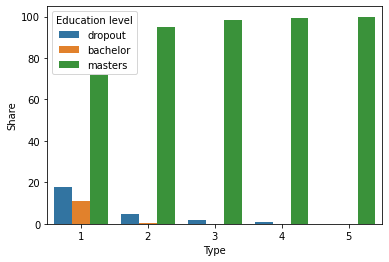

In [101]:
stats_df = pd.DataFrame(data=[dropout_shares, bachelor_shares, masters_shares], columns=['1', '2', '3', '4', '5'], index=['dropout', 'bachelor', 'masters'])

stats_df_long = stats_df.reset_index().melt(id_vars='index', var_name='category', value_name='value')

# Rename the columns
stats_df_long.columns = ['Education level', 'Type', 'Share']

# Plot the data
sns.barplot(data=stats_df_long, x='Type', y='Share', hue='Education level')

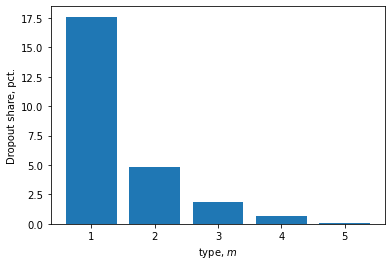

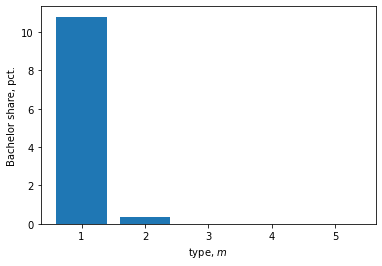

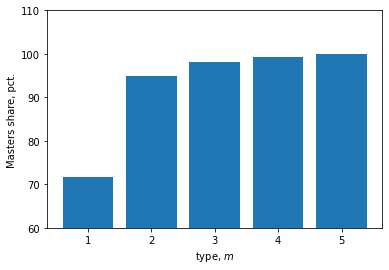

In [102]:
#Seperate plots

fig, ax = plt.subplots()
ax.bar(range(1,(par.Nm+1)),dropout_shares)
ax.set(xlabel='type, $m$',ylabel='Dropout share, pct.');

fig, ax = plt.subplots()
ax.bar(range(1,(par.Nm+1)),bachelor_shares)
ax.set(xlabel='type, $m$',ylabel='Bachelor share, pct.');

fig, ax = plt.subplots()
ax.bar(range(1,(par.Nm+1)),masters_shares)
ax.set(xlabel='type, $m$',ylabel='Masters share, pct.')
ax.set_ylim(60,110);

## How many takes slutloans?


In [103]:
# slutloan = np.zeros(par.Nm)

# #type 0
# slutloan_0 = np.zeros(len(m_0))

# for idx, i in enumerate(m_0):
#         slutloan_0[idx] = su_fattig_model.sim.g[i,par.t_ls]>0.000001

# slutloan[0] = np.sum(slutloan_0)/len(m_0)*100

# #type 1
# slutloan_1 = np.zeros(len(m_1))

# for idx, i in enumerate(m_1):
#         slutloan_1[idx] = su_fattig_model.sim.g[i,par.t_ls]>0.000001

# slutloan[1] = np.sum(slutloan_1)/len(m_1)*100

# #type 2
# slutloan_2 = np.zeros(len(m_2))

# for idx, i in enumerate(m_2):
#         slutloan_2[idx] = su_fattig_model.sim.g[i,par.t_ls]>0.000001

# slutloan[2] = np.sum(slutloan_2)/len(m_2)*100

# #type 3
# slutloan_3 = np.zeros(len(m_3))

# for idx, i in enumerate(m_3):
#         slutloan_3[idx] = su_fattig_model.sim.g[i,par.t_ls]>0.000001

# slutloan[3] = np.sum(slutloan_3)/len(m_3)*100

# #type 4
# slutloan_4 = np.zeros(len(m_4))

# for idx, i in enumerate(m_4):
#         slutloan_4[idx] = su_fattig_model.sim.g[i,par.t_ls]>0.000001

# slutloan[4] = np.sum(slutloan_4)/len(m_4)*100

In [104]:
# slutloan

array([73.529412, 51.68695 , 19.329508,  4.378109,  0.494251])

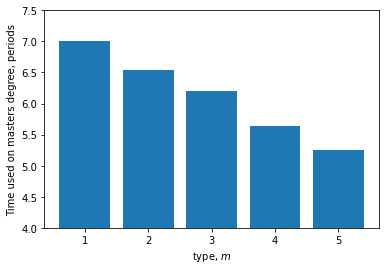

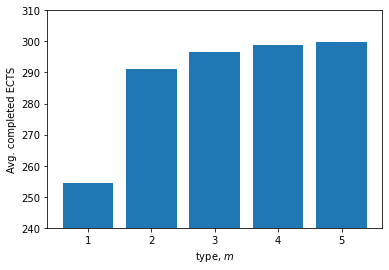

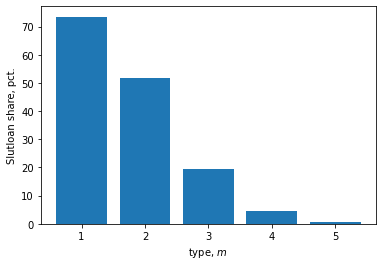

In [105]:
fig, ax = plt.subplots()
ax.bar(range(1,(par.Nm+1)),time,bottom=0)
ax.set(xlabel='type, $m$',ylabel='Time used on masters degree, periods')
ax.set_ylim([4, 7.5]);

fig, ax = plt.subplots()
ax.bar(range(1,(par.Nm+1)),ects)
ax.set(xlabel='type, $m$',ylabel='Avg. completed ECTS')
ax.set_ylim([240, 310]);

fig, ax = plt.subplots()
ax.bar(range(1,(par.Nm+1)),utility)
ax.set(xlabel='type, $m$',ylabel='Avg. discounted utility');

# fig, ax = plt.subplots()
# ax.bar(range(1,(par.Nm+1)),slutloan)
# ax.set(xlabel='type, $m$',ylabel='Slutloan share, pct.');



# Højere varians for lavtuddannede

In [106]:
from varians_lavtuddannede import VariansLavtuddClass

In [107]:
# def zero_budget5(tax):
#     varians_lavtudd_model = VariansLavtuddClass(par={'r':0.02,'beta':0.98,'Nm':5,'upsilon':1.05,'rho':12.0,'gamma_max':0.012,'gamma_min':0.019,'tau':5,'tax':tax,'su':0.16,'sigma_s':0.3})
#     varians_lavtudd_model.solve()
#     varians_lavtudd_model.sim.a_init[:]=0.0
#     varians_lavtudd_model.sim.e_init[:]=0.0
#     varians_lavtudd_model.simulate()
#     return ((np.sum(0.4*np.mean(varians_lavtudd_model.sim.income[:,:-1],axis=0)) - (np.sum(np.mean(varians_lavtudd_model.sim.su[:,:-1],axis=0))))-(np.sum(0.4*np.mean(base_model_sim.sim.income[:,:-1],axis=0)) - (np.sum(np.mean(base_model_sim.sim.su[:,:-1],axis=0)))))

# res5 = optimize.root_scalar(zero_budget5, bracket=[0.3, 0.5], method='brentq')

In [108]:
# print(res5)

In [109]:
varians_lavtudd_model = VariansLavtuddClass(par={'r':0.02,'beta':0.98,'Nm':5,'upsilon':1.05,'rho':12.0,'gamma_max':0.012,'gamma_min':0.019,'tau':5,'tax':0.4,'su':0.16,'sigma_s':0.3})

par = varians_lavtudd_model.par
sol = varians_lavtudd_model.sol
sim = varians_lavtudd_model.sim

In [110]:
%time varians_lavtudd_model.solve()

48
47


46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
CPU times: user 8min 27s, sys: 5.81 s, total: 8min 33s
Wall time: 8min 52s


In [111]:
varians_lavtudd_model.sim.a_init[:] = 0.0
varians_lavtudd_model.sim.e_init[:] = 0
varians_lavtudd_model.simulate()

In [112]:
sim_a_list_2 = np.mean(varians_lavtudd_model.sim.a,axis=0)
sim_a_list_2[5] = sim_a_list_2[4]

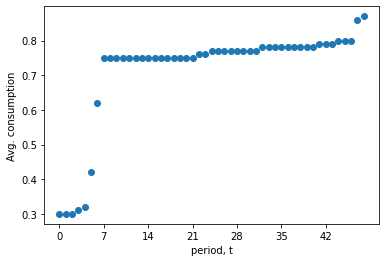

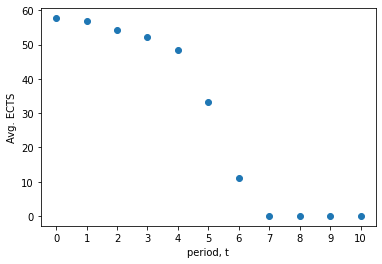

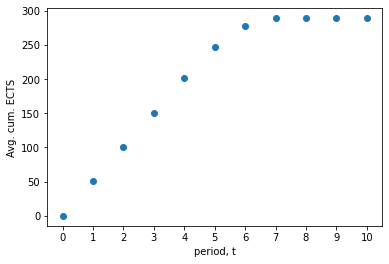

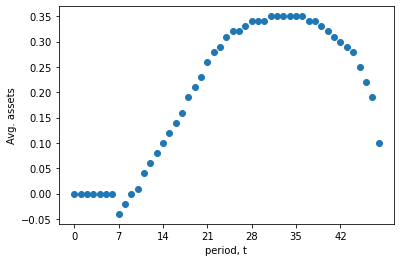

In [113]:
#Simulation graphs
fig, ax = plt.subplots()
ax.scatter(range(par.simT),np.around(np.mean(varians_lavtudd_model.sim.c,axis=0),decimals=2))
ax.set(xlabel='period, t',ylabel='Avg. consumption',xticks=range(0,par.simT,7));

fig, ax = plt.subplots()
ax.scatter(range(par.t_ls+5),np.around(np.mean(varians_lavtudd_model.sim.g[:,0:par.t_ls+5],axis=0),decimals=2))
ax.set(xlabel='period, t',ylabel='Avg. ECTS',xticks=range(par.t_ls+5));

fig, ax = plt.subplots()
ax.scatter(range(par.t_ls+5),np.around(np.mean(varians_lavtudd_model.sim.G[:,0:par.t_ls+5],axis=0),decimals=2))
ax.set(xlabel='period, t',ylabel='Avg. cum. ECTS',xticks=range(par.t_ls+5));

fig, ax = plt.subplots()
ax.scatter(range(par.simT),np.around(sim_a_list_2,decimals=2))
ax.set(xlabel='period, t',ylabel='Avg. assets',xticks=range(0,par.simT,7));

## Avg. utility

In [171]:
np.sum(np.mean(varians_lavtudd_model.sim.V, axis=0))

-47.75435455373526

## Types

In [114]:
time = np.zeros(par.Nm)

In [115]:
m_0 = []
m_1 = []
m_2 = []
m_3 = []
m_4 = []

for i_idx, i in enumerate(varians_lavtudd_model.sim.m_init):
    
    if i == 0:
        m_0.append(i_idx)
    
    if i == 1:
        m_1.append(i_idx)
    
    if i == 2:
        m_2.append(i_idx)
    
    if i == 3:
        m_3.append(i_idx)
    
    if i == 4:
        m_4.append(i_idx)


In [172]:
utility = np.zeros(par.Nm)

util_0 = []
for i in m_0:
    util_0.append(np.sum(varians_lavtudd_model.sim.V[i,:]))

utility[0] = np.mean(util_0)

util_1 = []
for i in m_1:
    util_1.append(np.sum(varians_lavtudd_model.sim.V[i,:]))

utility[1] = np.mean(util_1)

util_2 = []
for i in m_2:
    util_2.append(np.sum(varians_lavtudd_model.sim.V[i,:]))

utility[2] = np.mean(util_2)

util_3 = []
for i in m_3:
    util_3.append(np.sum(varians_lavtudd_model.sim.V[i,:]))

utility[3] = np.mean(util_3)

util_4 = []
for i in m_4:
    util_4.append(np.sum(varians_lavtudd_model.sim.V[i,:]))

utility[4] = np.mean(util_4)

print(utility)



[-47.747357 -47.734034 -47.760803 -47.775642 -47.753959]


## Average completion time

In [169]:
#type 0
study_0 = np.zeros(len(m_0))

for idx, i in enumerate(m_0):
        if varians_lavtudd_model.sim.G[i,par.T-1] < 299:
                study_0[idx] = np.NaN
        else:
                study_0[idx] = np.sum(varians_lavtudd_model.sim.g[i,:]>0.000001)

time[0] = np.nanmean(study_0)

#type 1
study_1 = np.zeros(len(m_1))

for idx, i in enumerate(m_1):
        if varians_lavtudd_model.sim.G[i,par.T-1] < 299:
                study_1[idx] = np.NaN
        else:
                study_1[idx] = np.sum(varians_lavtudd_model.sim.g[i,:]>0.000001)

time[1] = np.nanmean(study_1)

#type 2
study_2 = np.zeros(len(m_2))

for idx, i in enumerate(m_2):
        if varians_lavtudd_model.sim.G[i,par.T-1] < 299:
                study_2[idx] = np.NaN
        else:
                study_2[idx] = np.sum(varians_lavtudd_model.sim.g[i,:]>0.000001)

time[2] = np.nanmean(study_2)

#type 3
study_3 = np.zeros(len(m_3))

for idx, i in enumerate(m_3):
        if varians_lavtudd_model.sim.G[i,par.T-1] < 299:
                study_3[idx] = np.NaN
        else:
                study_3[idx] = np.sum(varians_lavtudd_model.sim.g[i,:]>0.000001)

time[3] = np.nanmean(study_3)

#type 4
study_4 = np.zeros(len(m_4))

for idx, i in enumerate(m_4):
        if varians_lavtudd_model.sim.G[i,par.T-1] < 299:
                study_4[idx] = np.NaN
        else:
                study_4[idx] = np.sum(varians_lavtudd_model.sim.g[i,:]>0.000001)

time[4] = np.nanmean(study_4)

print(time)


[6.096101 6.084255 6.081798 6.090067 6.099159]


# Average completed ECTS points

In [156]:
ects = np.zeros(par.Nm)

list_0 = []
for i in m_0:
    list_0.append(varians_lavtudd_model.sim.G[i,par.T-1])

ects[0] = np.mean(list_0)

list_1 = []
for i in m_1:
    list_1.append(varians_lavtudd_model.sim.G[i,par.T-1])

ects[1] = np.mean(list_1)

list_2 = []
for i in m_2:
    list_2.append(varians_lavtudd_model.sim.G[i,par.T-1])

ects[2] = np.mean(list_2)

list_3 = []
for i in m_3:
    list_3.append(varians_lavtudd_model.sim.G[i,par.T-1])

ects[3] = np.mean(list_3)

list_4 = []
for i in m_4:
    list_4.append(varians_lavtudd_model.sim.G[i,par.T-1])

ects[4] = np.mean(list_4)

print(ects)



[289.236332 289.067539 288.34301  288.252855 289.453788]


## How many: drop out, bachelors degree, masters degree

In [118]:
dropout_0=0
dropout_1=0
dropout_2=0
dropout_3=0
dropout_4=0

bachelor_0=0
bachelor_1=0
bachelor_2=0
bachelor_3=0
bachelor_4=0

masters_0=0
masters_1=0
masters_2=0
masters_3=0
masters_4=0

In [119]:
dropout_counts = []
bachelor_counts = []
masters_counts = []

for lst, dropout_count, bachelor_count, masters_count in zip([list_0, list_1, list_2, list_3, list_4], 
                                                              [dropout_0, dropout_1, dropout_2, dropout_3, dropout_4], 
                                                              [bachelor_0, bachelor_1, bachelor_2, bachelor_3, bachelor_4], 
                                                              [masters_0, masters_1, masters_2, masters_3, masters_4]):
    dropout_counts.append(dropout_count)
    bachelor_counts.append(bachelor_count)
    masters_counts.append(masters_count)

    for i in lst:
        if i < par.bachelor:
            dropout_counts[-1] += 1
        if par.bachelor <= i < par.complete - 1e-5:
            bachelor_counts[-1] += 1
        if par.complete-1e-5<=i:
            masters_counts[-1] += 1

dropout_shares = [count / len(lst) * 100 for count, lst in zip(dropout_counts, [list_0, list_1, list_2, list_3, list_4])]
bachelor_shares = [count / len(lst) * 100 for count, lst in zip(bachelor_counts, [list_0, list_1, list_2, list_3, list_4])]
masters_shares = [count / len(lst) * 100 for count, lst in zip(masters_counts, [list_0, list_1, list_2, list_3, list_4])]

In [120]:
print(dropout_shares)
print(bachelor_shares)
print(masters_shares)

[16.436282917969933, 5.06480558325025, 2.0055877070445023, 0.6409614421632449, 0.10943095901313173]
[10.725456563414388, 0.2093718843469591, 0.009978048293753742, 0.0, 0.0]
[72.83826051861568, 94.72582253240279, 97.98443424466174, 99.35903855783675, 99.89056904098686]


<AxesSubplot:xlabel='Type', ylabel='Share'>

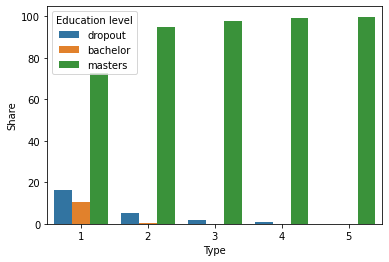

In [121]:
stats_df = pd.DataFrame(data=[dropout_shares, bachelor_shares, masters_shares], columns=['1', '2', '3', '4', '5'], index=['dropout', 'bachelor', 'masters'])

stats_df_long = stats_df.reset_index().melt(id_vars='index', var_name='category', value_name='value')

# Rename the columns
stats_df_long.columns = ['Education level', 'Type', 'Share']

# Plot the data
sns.barplot(data=stats_df_long, x='Type', y='Share', hue='Education level')

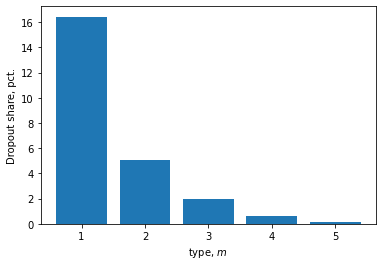

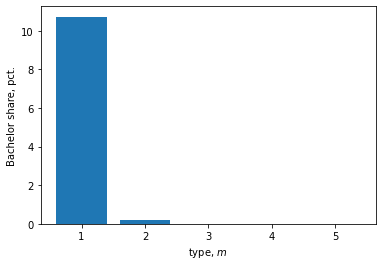

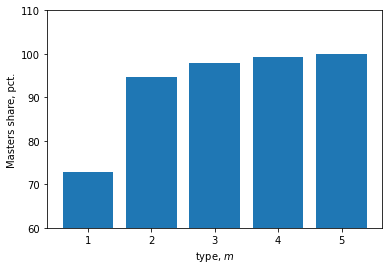

In [122]:
#Seperate plots

fig, ax = plt.subplots()
ax.bar(range(1,(par.Nm+1)),dropout_shares)
ax.set(xlabel='type, $m$',ylabel='Dropout share, pct.');

fig, ax = plt.subplots()
ax.bar(range(1,(par.Nm+1)),bachelor_shares)
ax.set(xlabel='type, $m$',ylabel='Bachelor share, pct.');

fig, ax = plt.subplots()
ax.bar(range(1,(par.Nm+1)),masters_shares)
ax.set(xlabel='type, $m$',ylabel='Masters share, pct.')
ax.set_ylim(60,110);

## How many takes slutloans?


In [123]:
slutloan = np.zeros(par.Nm)

#type 0
slutloan_0 = np.zeros(len(m_0))

for idx, i in enumerate(m_0):
        slutloan_0[idx] = varians_lavtudd_model.sim.g[i,par.t_ls]>0.000001

slutloan[0] = np.sum(slutloan_0)/len(m_0)*100

#type 1
slutloan_1 = np.zeros(len(m_1))

for idx, i in enumerate(m_1):
        slutloan_1[idx] = varians_lavtudd_model.sim.g[i,par.t_ls]>0.000001

slutloan[1] = np.sum(slutloan_1)/len(m_1)*100

#type 2
slutloan_2 = np.zeros(len(m_2))

for idx, i in enumerate(m_2):
        slutloan_2[idx] = varians_lavtudd_model.sim.g[i,par.t_ls]>0.000001

slutloan[2] = np.sum(slutloan_2)/len(m_2)*100

#type 3
slutloan_3 = np.zeros(len(m_3))

for idx, i in enumerate(m_3):
        slutloan_3[idx] = varians_lavtudd_model.sim.g[i,par.t_ls]>0.000001

slutloan[3] = np.sum(slutloan_3)/len(m_3)*100

#type 4
slutloan_4 = np.zeros(len(m_4))

for idx, i in enumerate(m_4):
        slutloan_4[idx] = varians_lavtudd_model.sim.g[i,par.t_ls]>0.000001

slutloan[4] = np.sum(slutloan_4)/len(m_4)*100

In [124]:
slutloan

array([74.815861, 51.316052, 19.896228,  4.536805,  0.577   ])

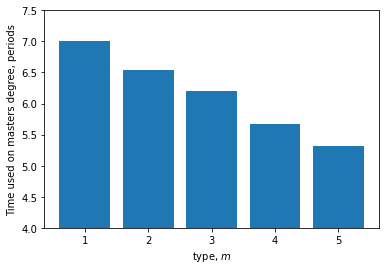

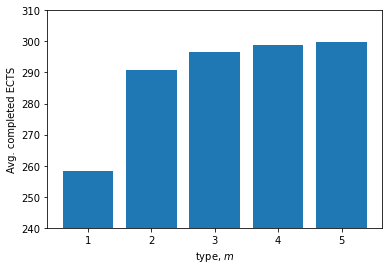

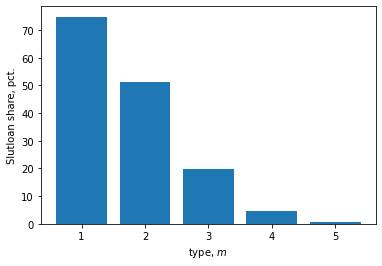

In [125]:
fig, ax = plt.subplots()
ax.bar(range(1,(par.Nm+1)),time,bottom=0)
ax.set(xlabel='type, $m$',ylabel='Time used on masters degree, periods')
ax.set_ylim([4, 7.5]);

fig, ax = plt.subplots()
ax.bar(range(1,(par.Nm+1)),ects)
ax.set(xlabel='type, $m$',ylabel='Avg. completed ECTS')
ax.set_ylim([240, 310]);

fig, ax = plt.subplots()
ax.bar(range(1,(par.Nm+1)),slutloan)
ax.set(xlabel='type, $m$',ylabel='Slutloan share, pct.');

fig, ax = plt.subplots()
ax.bar(range(1,(par.Nm+1)),utility)
ax.set(xlabel='type, $m$',ylabel='Avg. discounted utility');

